In [55]:
import pandas as pd
import numpy as np
from numpy import arange
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
import lightgbm as lgbm
from skopt.space import Real,Integer, Categorical
from skopt import BayesSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [57]:
train_org=pd.read_csv('train.csv')
train = train_org.copy()

In [58]:
pd.set_option('display.max_columns', None)
train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.00,False,0.00,0.00,0.00,0.00,0.00,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.00,False,109.00,9.00,25.00,549.00,44.00,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.00,True,43.00,3576.00,0.00,6715.00,49.00,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.00,False,0.00,1283.00,371.00,3329.00,193.00,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.00,False,303.00,70.00,151.00,565.00,2.00,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.00,True,0.00,6819.00,0.00,1643.00,74.00,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.00,False,0.00,0.00,0.00,0.00,0.00,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.00,False,0.00,0.00,1872.00,1.00,0.00,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.00,False,0.00,1049.00,0.00,353.00,3235.00,Celeon Hontichre,False


In [59]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.00,8512.00,8510.00,8485.00,8510.00,8505.00
mean,28.83,224.69,458.08,173.73,311.14,304.85
std,14.49,666.72,1611.49,604.70,1136.71,1145.72
min,0.00,0.00,0.00,0.00,0.00,0.00
25%,19.00,0.00,0.00,0.00,0.00,0.00
50%,27.00,0.00,0.00,0.00,0.00,0.00
75%,38.00,47.00,76.00,27.00,59.00,46.00
max,79.00,14327.00,29813.00,23492.00,22408.00,24133.00


In [60]:
train.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [61]:
def condition_1(x):
    if x==True:
        return '1'
    elif x == False:
        return '0'
    else:
        return '-1'

def condition_2(x):
    if x==0:
        return 0
    elif x>0:
        return 1
    else:
        return -1
    
def condition_3(x):
    try: 
        np.isnan(x)
        return 'U/-1/U'
    except:
        return x
    
def condition_4(x):
    try: 
        np.isnan(x)
        return '-1_-1'
    except:
        return x
    
def condition_5(x):
    try: 
        np.isnan(x)
        return 'Unknown'
    except:
        return x
    
def condition_6(x):
    if x==0:
        return "0"
    elif x <805:
        return "25%"
    elif x<1239:
        return "50%"
    elif x<2700:
        return "75%"
    else:
        return "100%"
    
def condition_7(x):
    try: 
        np.isnan(x)
        return 'Unknown Unknown'
    except:
        return x

In [62]:
train['CryoSleep'] = train['CryoSleep'].apply(condition_1)
train['VIP'] = train['VIP'].apply(condition_1)
train['Transported'] = train['Transported'].apply(condition_1)
train['Use_RoomService'] = train['RoomService'].apply(condition_2)
train['Use_FoodCourt'] = train['FoodCourt'].apply(condition_2)
train['Use_ShoppingMall'] = train['ShoppingMall'].apply(condition_2)
train['Use_Spa'] = train['Spa'].apply(condition_2)
train['Use_VRDeck'] = train['VRDeck'].apply(condition_2)

In [63]:
train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Use_RoomService,Use_FoodCourt,Use_ShoppingMall,Use_Spa,Use_VRDeck
0,0001_01,Europa,0,B/0/P,TRAPPIST-1e,39.00,0,0.00,0.00,0.00,0.00,0.00,Maham Ofracculy,0,0,0,0,0,0
1,0002_01,Earth,0,F/0/S,TRAPPIST-1e,24.00,0,109.00,9.00,25.00,549.00,44.00,Juanna Vines,1,1,1,1,1,1
2,0003_01,Europa,0,A/0/S,TRAPPIST-1e,58.00,1,43.00,3576.00,0.00,6715.00,49.00,Altark Susent,0,1,1,0,1,1
3,0003_02,Europa,0,A/0/S,TRAPPIST-1e,33.00,0,0.00,1283.00,371.00,3329.00,193.00,Solam Susent,0,0,1,1,1,1
4,0004_01,Earth,0,F/1/S,TRAPPIST-1e,16.00,0,303.00,70.00,151.00,565.00,2.00,Willy Santantines,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,0,A/98/P,55 Cancri e,41.00,1,0.00,6819.00,0.00,1643.00,74.00,Gravior Noxnuther,0,0,1,0,1,1
8689,9278_01,Earth,1,G/1499/S,PSO J318.5-22,18.00,0,0.00,0.00,0.00,0.00,0.00,Kurta Mondalley,0,0,0,0,0,0
8690,9279_01,Earth,0,G/1500/S,TRAPPIST-1e,26.00,0,0.00,0.00,1872.00,1.00,0.00,Fayey Connon,1,0,0,1,1,0
8691,9280_01,Europa,0,E/608/S,55 Cancri e,32.00,0,0.00,1049.00,0.00,353.00,3235.00,Celeon Hontichre,0,0,1,0,1,1


In [64]:
train['Cabin'] = train['Cabin'].apply(condition_3)
train['Cabin_deck'] = train['Cabin'].map(lambda x: x.split('/')[0])
train['Cabin_num'] = train['Cabin'].map(lambda x: int(x.split('/')[1]))
train['Cabin_side'] = train['Cabin'].map(lambda x: x.split('/')[2])

In [65]:
train['PassengerId'] = train['PassengerId'].apply(condition_4)
train['Group_Id'] = train['PassengerId'].map(lambda x: int(x.split('_')[0]))
train['Id'] = train['PassengerId'].map(lambda x: x.split('_')[1])

Text(0, 0.5, 'Number of passengers')

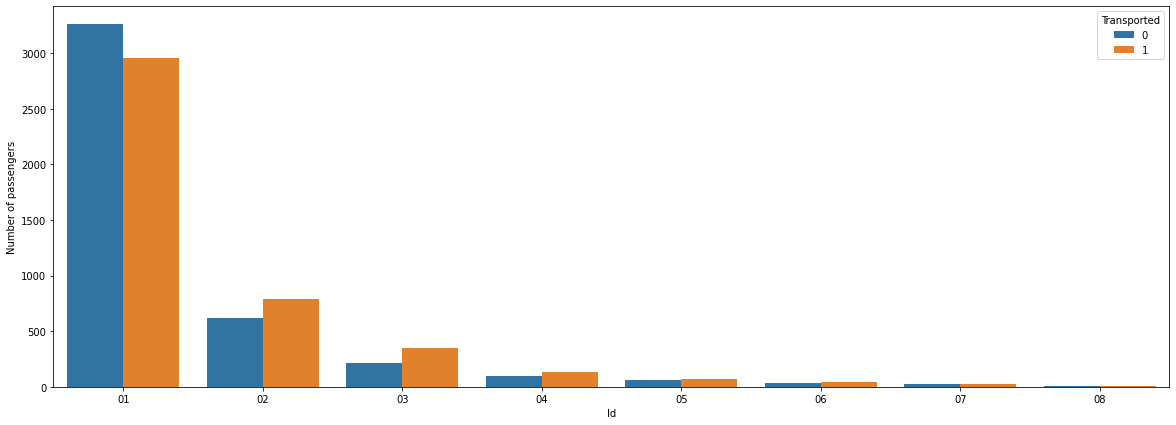

In [13]:
figure = plt.figure(figsize=(20, 7))
sns.countplot(x='Id', data=train, hue = 'Transported')
plt.xlabel('Id')
plt.ylabel('Number of passengers')

In [66]:
train['HomePlanet'] = train['HomePlanet'].apply(condition_5)
train['Destination'] = train['Destination'].apply(condition_5)

In [67]:
train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Use_RoomService,Use_FoodCourt,Use_ShoppingMall,Use_Spa,Use_VRDeck,Cabin_deck,Cabin_num,Cabin_side,Group_Id,Id
0,0001_01,Europa,0,B/0/P,TRAPPIST-1e,39.00,0,0.00,0.00,0.00,0.00,0.00,Maham Ofracculy,0,0,0,0,0,0,B,0,P,1,01
1,0002_01,Earth,0,F/0/S,TRAPPIST-1e,24.00,0,109.00,9.00,25.00,549.00,44.00,Juanna Vines,1,1,1,1,1,1,F,0,S,2,01
2,0003_01,Europa,0,A/0/S,TRAPPIST-1e,58.00,1,43.00,3576.00,0.00,6715.00,49.00,Altark Susent,0,1,1,0,1,1,A,0,S,3,01
3,0003_02,Europa,0,A/0/S,TRAPPIST-1e,33.00,0,0.00,1283.00,371.00,3329.00,193.00,Solam Susent,0,0,1,1,1,1,A,0,S,3,02
4,0004_01,Earth,0,F/1/S,TRAPPIST-1e,16.00,0,303.00,70.00,151.00,565.00,2.00,Willy Santantines,1,1,1,1,1,1,F,1,S,4,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,0,A/98/P,55 Cancri e,41.00,1,0.00,6819.00,0.00,1643.00,74.00,Gravior Noxnuther,0,0,1,0,1,1,A,98,P,9276,01
8689,9278_01,Earth,1,G/1499/S,PSO J318.5-22,18.00,0,0.00,0.00,0.00,0.00,0.00,Kurta Mondalley,0,0,0,0,0,0,G,1499,S,9278,01
8690,9279_01,Earth,0,G/1500/S,TRAPPIST-1e,26.00,0,0.00,0.00,1872.00,1.00,0.00,Fayey Connon,1,0,0,1,1,0,G,1500,S,9279,01
8691,9280_01,Europa,0,E/608/S,55 Cancri e,32.00,0,0.00,1049.00,0.00,353.00,3235.00,Celeon Hontichre,0,0,1,0,1,1,E,608,S,9280,01


In [68]:
column_headers = ['RoomService','FoodCourt', 'ShoppingMall','Spa', 'VRDeck']
for col in column_headers:
    train[col].fillna(-1, inplace = True)

In [69]:
total_spent = []
column_check = ['Use_RoomService','Use_FoodCourt', 'Use_ShoppingMall','Use_Spa', 'Use_VRDeck']
column_headers = ['RoomService','FoodCourt', 'ShoppingMall','Spa', 'VRDeck']
for i in range(len(train)):
    row_spent = 0
    for c, col in enumerate(column_check):
        if train[col].loc[i]!= -1:
            row_spent = row_spent + train[column_headers[c]].loc[i]
    total_spent.append(row_spent)
train['Total_Spent'] = total_spent

In [70]:
train['Money_Spent'] = train['Total_Spent'].apply(condition_2)
train['Money_Bracket'] = train['Total_Spent'].apply(condition_6)

<Axes: xlabel='Money_Bracket', ylabel='Age'>

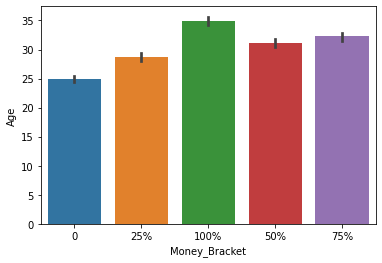

In [19]:
sns.barplot(y='Age',x='Money_Bracket', data=train)

<Axes: xlabel='VIP', ylabel='Age'>

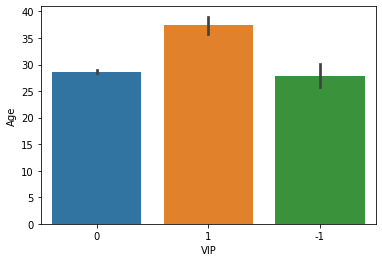

In [20]:
sns.barplot(y='Age',x='VIP', data=train)

<Axes: xlabel='HomePlanet', ylabel='Age'>

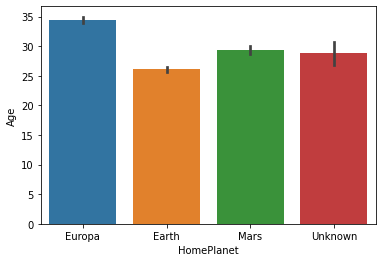

In [21]:
sns.barplot(y='Age',x='HomePlanet', data=train)

<Axes: xlabel='Destination', ylabel='Age'>

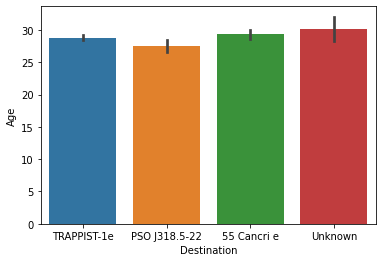

In [22]:
sns.barplot(y='Age',x='Destination', data=train)

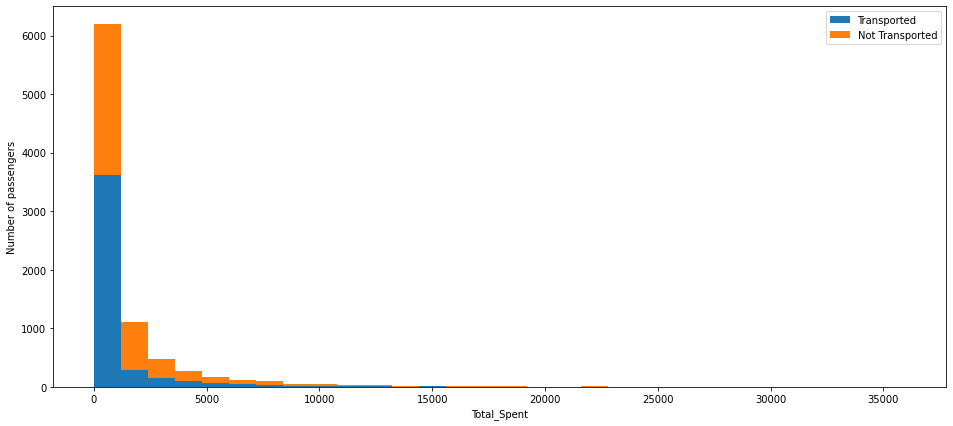

In [23]:
col = 'Total_Spent'
figure = plt.figure(figsize=(16, 7))
plt.hist([train[train['Transported'] == '1'][col], train[train['Transported'] == '0'][col]], 
         stacked=True, bins = 30, label = ['Transported','Not Transported'])
plt.xlabel(col)
plt.ylabel('Number of passengers')
plt.legend()

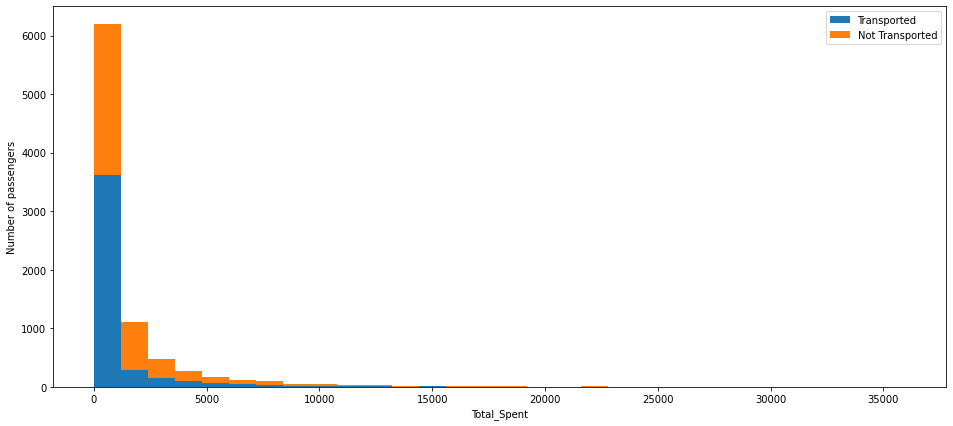

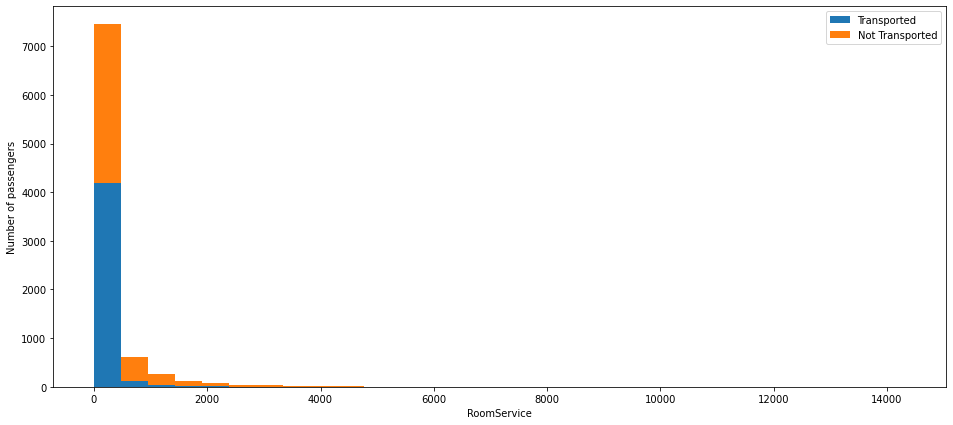

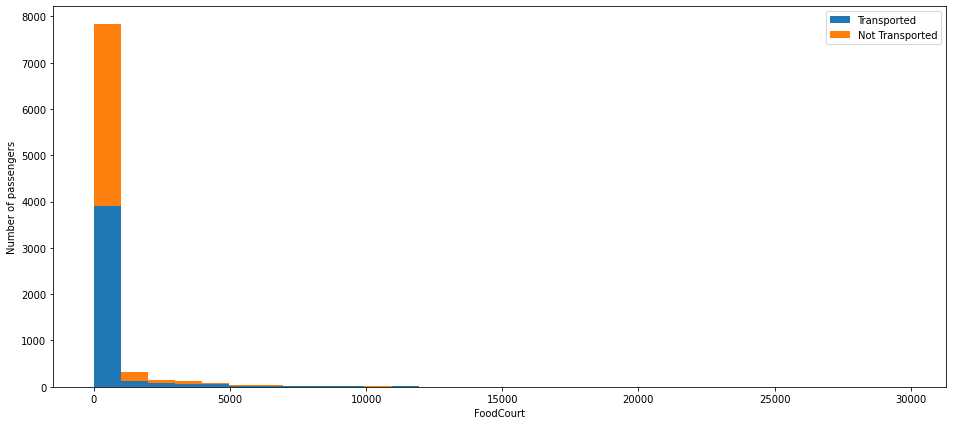

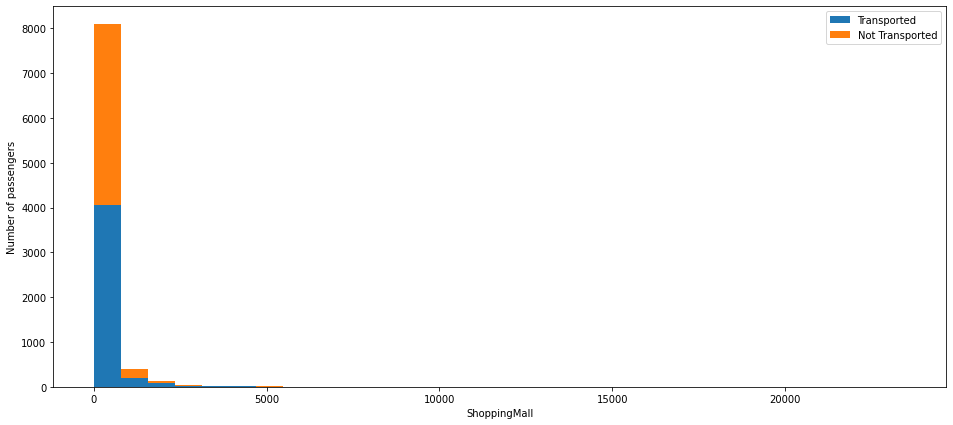

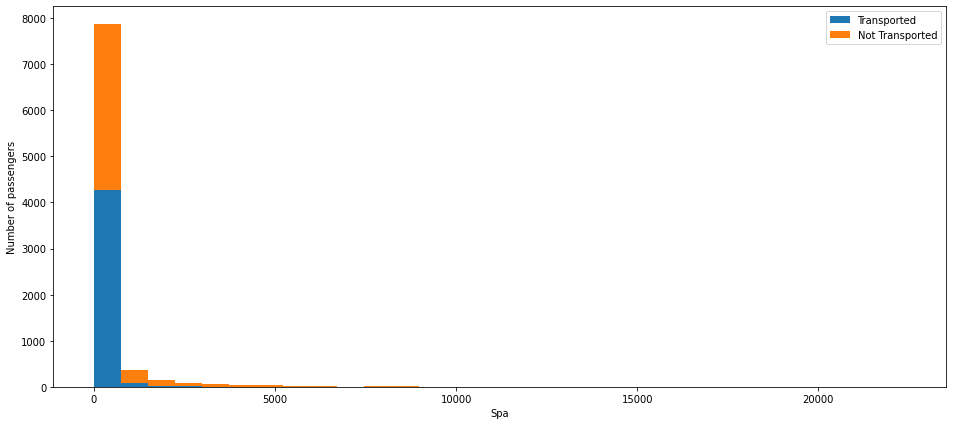

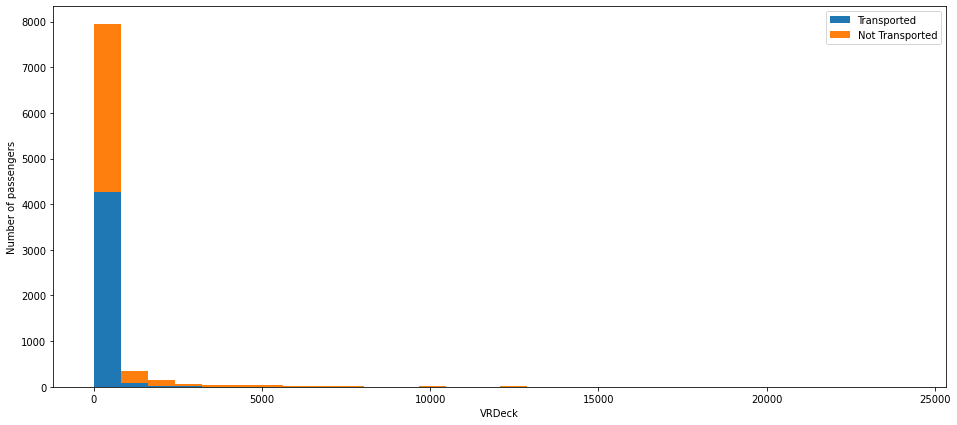

In [24]:
column_headers = ['Total_Spent', 'RoomService','FoodCourt', 'ShoppingMall','Spa', 'VRDeck']
for i, col in enumerate(column_headers):
    figure = plt.figure(figsize=(16, 7))
    plt.hist([train[train['Transported'] == '1'][col], train[train['Transported'] == '0'][col]], 
             stacked=True, bins = 30, label = ['Transported','Not Transported'])
    plt.xlabel(col)
    plt.ylabel('Number of passengers')
    plt.legend()

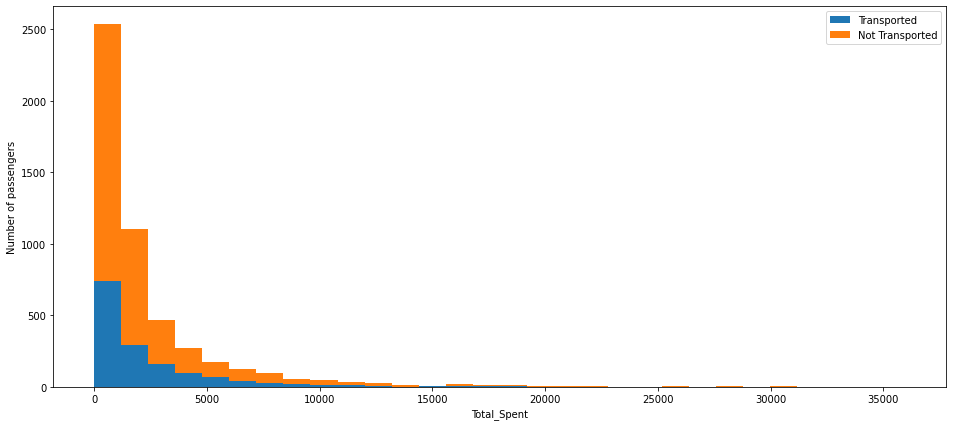

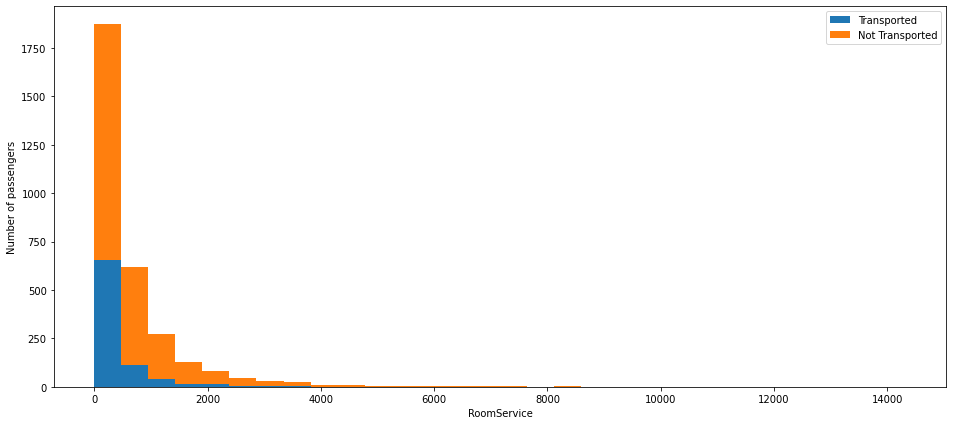

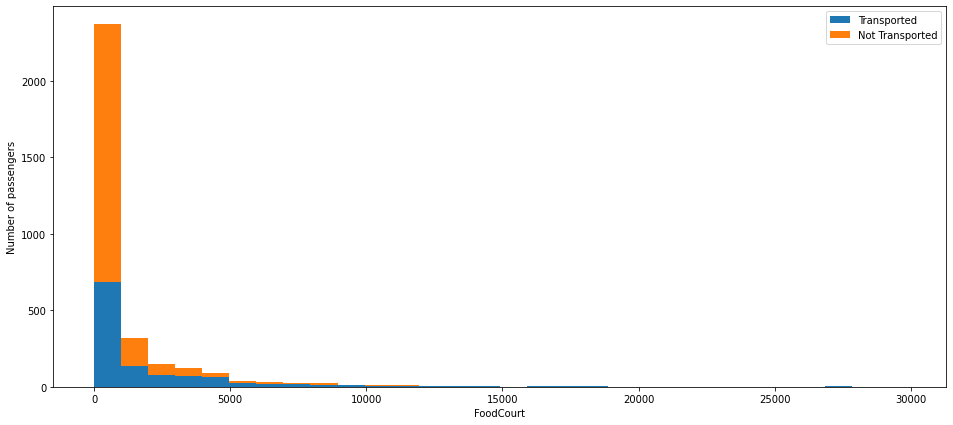

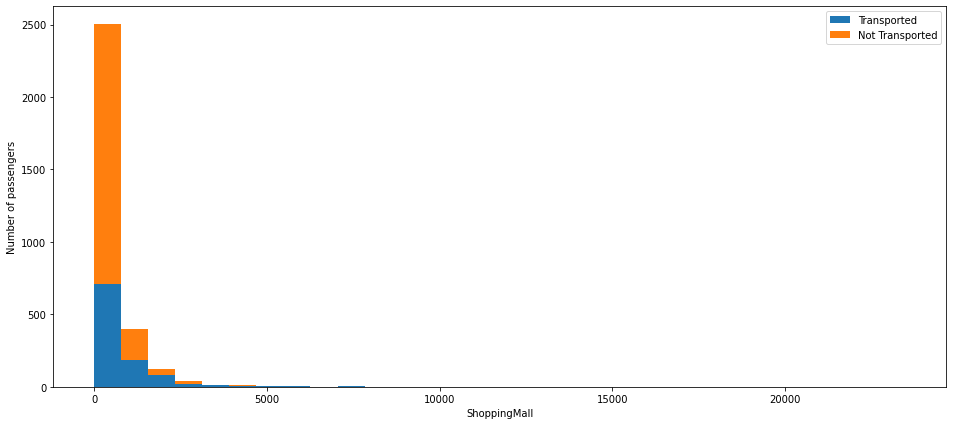

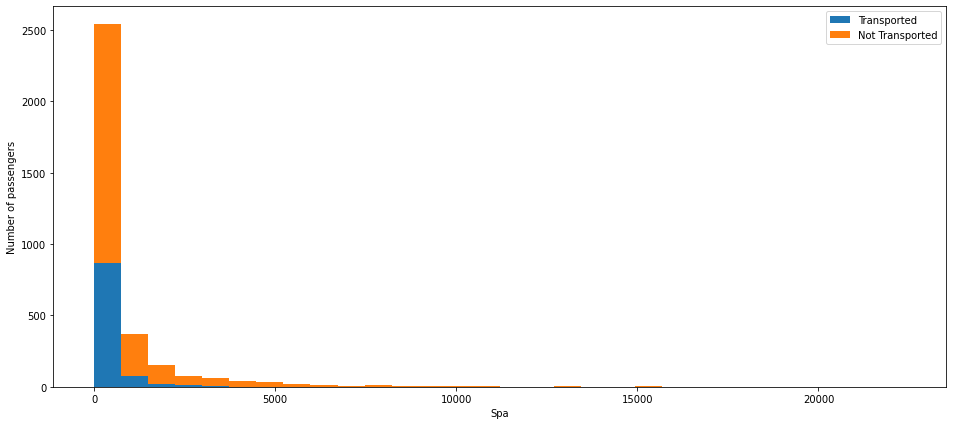

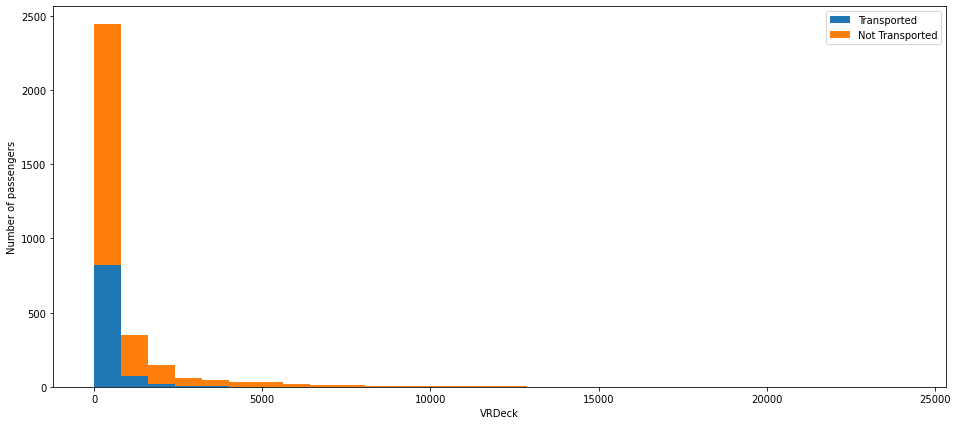

In [25]:
column_headers = ['Total_Spent', 'RoomService','FoodCourt', 'ShoppingMall','Spa', 'VRDeck']
for i, col in enumerate(column_headers):
    figure = plt.figure(figsize=(16, 7))
    not_zero = train[train[col]!=0]
    plt.hist([not_zero[not_zero['Transported'] == '1'][col], not_zero[not_zero['Transported'] == '0'][col]], 
             stacked=True, bins = 30, label = ['Transported','Not Transported'])
    plt.xlabel(col)
    plt.ylabel('Number of passengers')
    plt.legend()

Text(0, 0.5, 'Ratio')

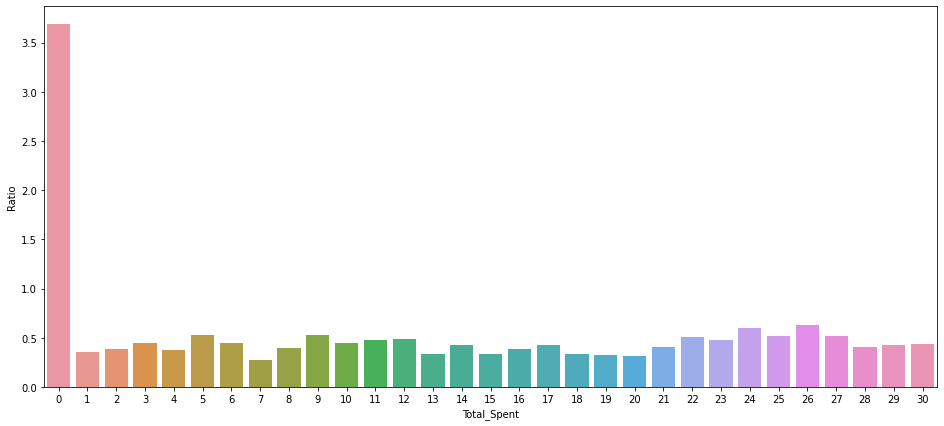

In [26]:
col ='Total_Spent'
eda_plot = train.copy()
eda_plot = eda_plot.sort_values(by = col)
eda_plot = eda_plot.reset_index(drop = True)
buckets = 29
bucket_len = int(len(eda_plot)/buckets)
bucket_num = []
bucks = []
buckets_ratio = []

bucks = [0] * len(eda_plot[eda_plot[col]<= 0])
bucket_len = int((len(eda_plot)-len(bucks))/buckets)
bucket_num = bucket_num + bucks

for b in range(1,buckets+2):
    bucks = [b]*bucket_len
    bucket_num = bucket_num + bucks

eda_plot['Bucket'] = bucket_num[0:len(eda_plot)]


for b in range(np.max(bucket_num)+1):
    buck = eda_plot[eda_plot['Bucket'] ==b]
    if len(buck[buck['Transported']=='0']) == 0 and len(buck[buck['Transported']=='1']) > 0:
        bucket_ratio = 10
        bucks_ratio = [bucket_ratio]*len(buck)
        buckets_ratio = buckets_ratio + bucks_ratio
    elif len(buck[buck['Transported']=='1']) == 0 and len(buck[buck['Transported']=='0']) == 0:
        print(col, b)
    else:
        bucket_ratio = len(buck[buck['Transported']=='1'])/len(buck[buck['Transported']=='0'])
        bucks_ratio = [bucket_ratio]*len(buck)
        buckets_ratio = buckets_ratio + bucks_ratio

eda_plot['Bucket_Ratio'] = buckets_ratio[0:len(eda_plot)]

figure = plt.figure(figsize=(16, 7))
sns.barplot(y='Bucket_Ratio',x='Bucket', data=eda_plot)
plt.xlabel(col)
plt.ylabel('Ratio')

In [27]:
c = 0
for i in range(len(bucket_num)):
    if bucket_num[i]==0:
        c = c+1
c

3653

Total_Spent 100
RoomService 99
RoomService 100
FoodCourt 100
VRDeck 99
VRDeck 100


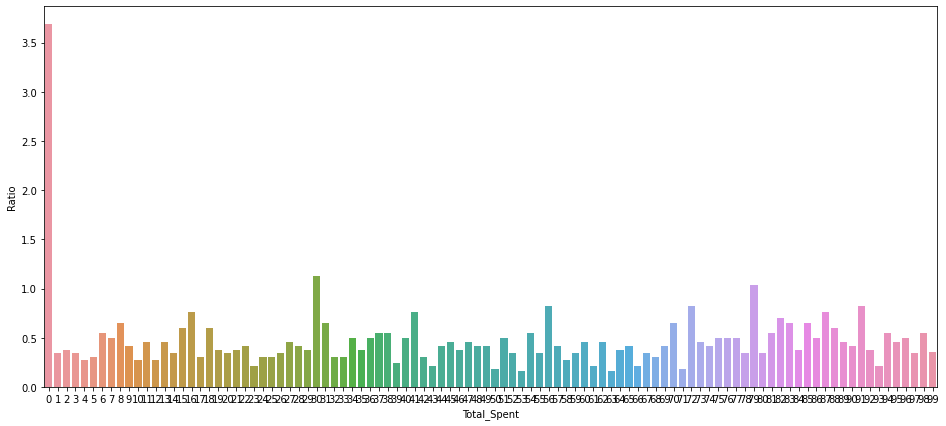

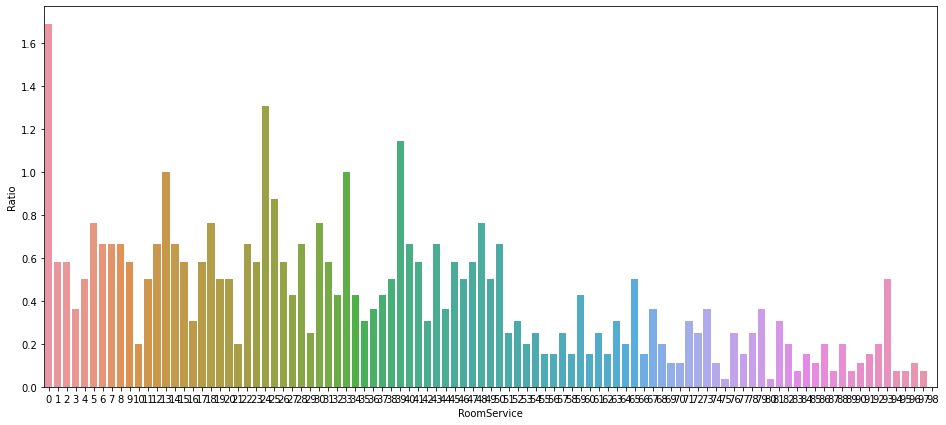

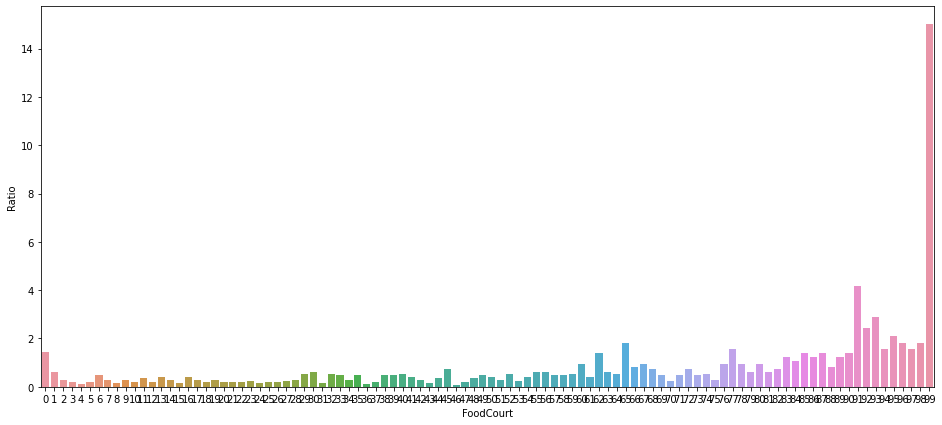

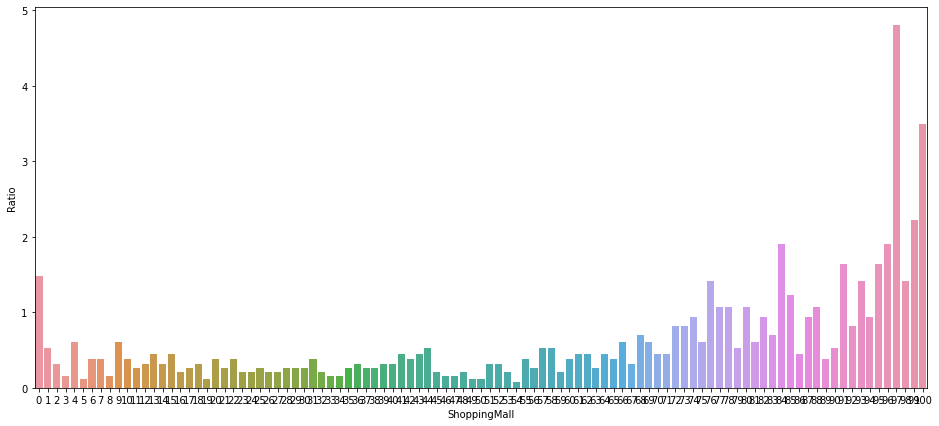

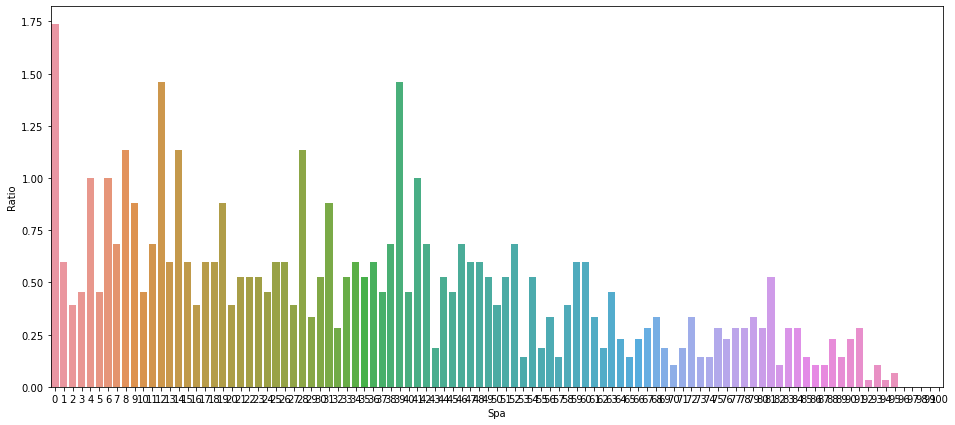

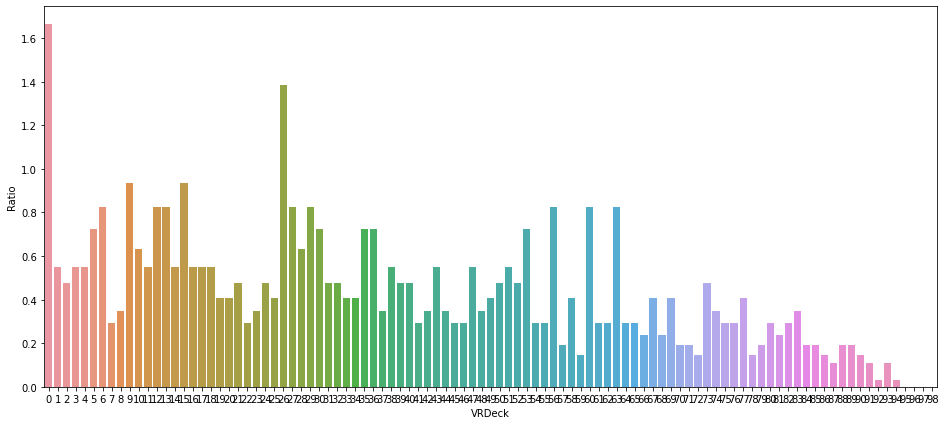

In [28]:
column_headers = ['Total_Spent', 'RoomService','FoodCourt', 'ShoppingMall','Spa', 'VRDeck']
for i, col in enumerate(column_headers):
    eda_plot = train.copy()
    eda_plot = eda_plot.sort_values(by = col)
    eda_plot = eda_plot.reset_index(drop = True)
    buckets = 99
    bucket_len = int(len(eda_plot)/buckets)
    bucket_num = []
    bucks = []
    buckets_ratio = []

    bucks = [0] * len(eda_plot[eda_plot[col]<= 0])
    bucket_len = int((len(eda_plot)-len(bucks))/(buckets-2))
    bucket_num = bucket_num + bucks

    for b in range(1,buckets+2):
        bucks = [b]*bucket_len
        bucket_num = bucket_num + bucks

    eda_plot['Bucket'] = bucket_num[0:len(eda_plot)]


    for b in range(np.max(bucket_num)+1):
        buck = eda_plot[eda_plot['Bucket'] ==b]
        if len(buck[buck['Transported']=='0']) == 0 and len(buck[buck['Transported']=='1']) > 0:
            bucket_ratio = 10
            bucks_ratio = [bucket_ratio]*len(buck)
            buckets_ratio = buckets_ratio + bucks_ratio
        elif len(buck[buck['Transported']=='1']) == 0 and len(buck[buck['Transported']=='0']) == 0:
            print(col, b)
        else:
            bucket_ratio = len(buck[buck['Transported']=='1'])/len(buck[buck['Transported']=='0'])
            bucks_ratio = [bucket_ratio]*len(buck)
            buckets_ratio = buckets_ratio + bucks_ratio

    eda_plot['Bucket_Ratio'] = buckets_ratio[0:len(eda_plot)]
    
    figure = plt.figure(figsize=(16, 7))
    sns.barplot(y='Bucket_Ratio',x='Bucket', data=eda_plot)
    plt.xlabel(col)
    plt.ylabel('Ratio')

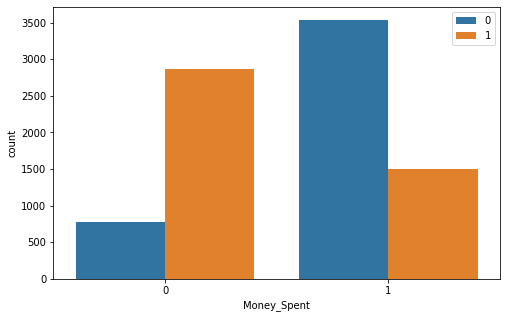

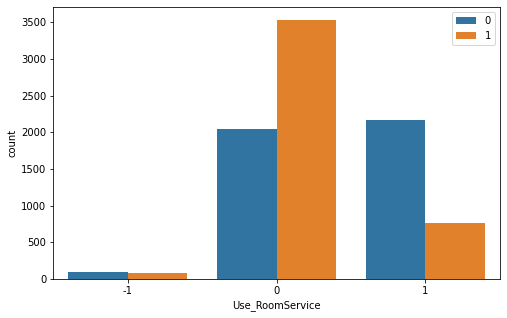

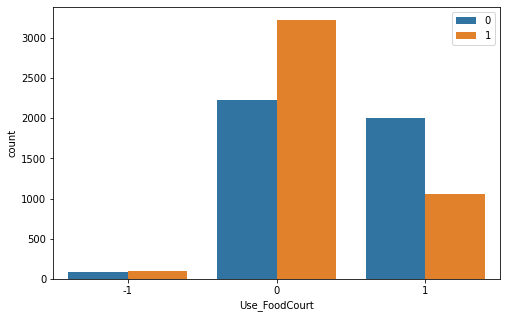

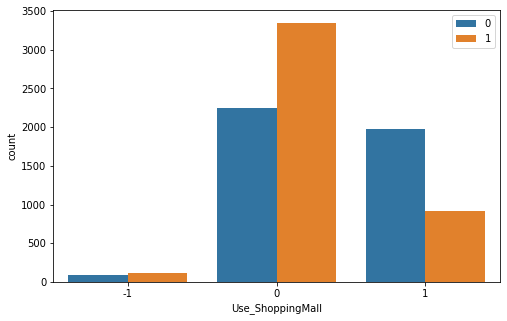

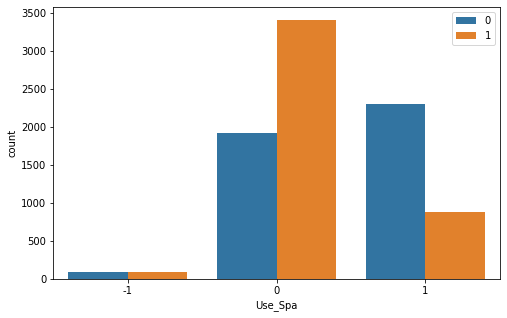

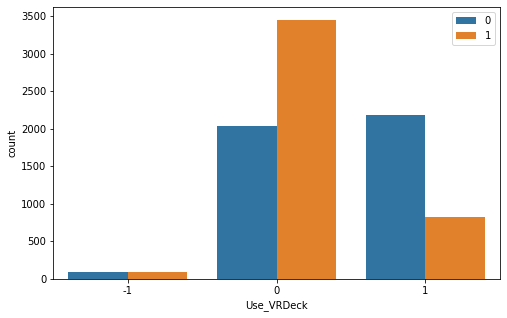

In [29]:
column_headers = ['Money_Spent', 'Use_RoomService','Use_FoodCourt', 'Use_ShoppingMall','Use_Spa', 'Use_VRDeck']
for col in column_headers:
    figure = plt.figure(figsize=(8, 5))
    sns.countplot(x=col, data=train, hue = 'Transported')
    plt.xlabel(col)
    plt.legend()

In [71]:
def age_aproximate(row,data):
    groups_median = data.iloc[:len(data)].groupby(['Destination', 'HomePlanet', 'VIP'])
    g_m_train = groups_median.median()
    g_m_train = g_m_train.reset_index()[['Destination', 'HomePlanet', 'VIP', 'Age']]
    output = ((g_m_train['Destination'] == row['Destination']) &
             (g_m_train['HomePlanet'] == row['HomePlanet'])  & (g_m_train['VIP'] == row['VIP'])) 
    return g_m_train[output]['Age'].values[0]

In [72]:
train['Age'] = train.apply(lambda row: age_aproximate(row, train) if np.isnan(row['Age']) else row['Age'], axis=1)

In [73]:
train = train.drop(['Money_Bracket'], axis = 1)

In [74]:
train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Use_RoomService,Use_FoodCourt,Use_ShoppingMall,Use_Spa,Use_VRDeck,Cabin_deck,Cabin_num,Cabin_side,Group_Id,Id,Total_Spent,Money_Spent
0,0001_01,Europa,0,B/0/P,TRAPPIST-1e,39.00,0,0.00,0.00,0.00,0.00,0.00,Maham Ofracculy,0,0,0,0,0,0,B,0,P,1,01,0.00,0
1,0002_01,Earth,0,F/0/S,TRAPPIST-1e,24.00,0,109.00,9.00,25.00,549.00,44.00,Juanna Vines,1,1,1,1,1,1,F,0,S,2,01,736.00,1
2,0003_01,Europa,0,A/0/S,TRAPPIST-1e,58.00,1,43.00,3576.00,0.00,6715.00,49.00,Altark Susent,0,1,1,0,1,1,A,0,S,3,01,10383.00,1
3,0003_02,Europa,0,A/0/S,TRAPPIST-1e,33.00,0,0.00,1283.00,371.00,3329.00,193.00,Solam Susent,0,0,1,1,1,1,A,0,S,3,02,5176.00,1
4,0004_01,Earth,0,F/1/S,TRAPPIST-1e,16.00,0,303.00,70.00,151.00,565.00,2.00,Willy Santantines,1,1,1,1,1,1,F,1,S,4,01,1091.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,0,A/98/P,55 Cancri e,41.00,1,0.00,6819.00,0.00,1643.00,74.00,Gravior Noxnuther,0,0,1,0,1,1,A,98,P,9276,01,8536.00,1
8689,9278_01,Earth,1,G/1499/S,PSO J318.5-22,18.00,0,0.00,0.00,0.00,0.00,0.00,Kurta Mondalley,0,0,0,0,0,0,G,1499,S,9278,01,0.00,0
8690,9279_01,Earth,0,G/1500/S,TRAPPIST-1e,26.00,0,0.00,0.00,1872.00,1.00,0.00,Fayey Connon,1,0,0,1,1,0,G,1500,S,9279,01,1873.00,1
8691,9280_01,Europa,0,E/608/S,55 Cancri e,32.00,0,0.00,1049.00,0.00,353.00,3235.00,Celeon Hontichre,0,0,1,0,1,1,E,608,S,9280,01,4637.00,1


<Axes: xlabel='HomePlanet', ylabel='count'>

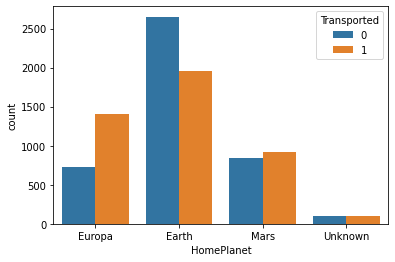

In [34]:
sns.countplot(x='HomePlanet', data=train, hue = 'Transported')

<Axes: xlabel='Destination', ylabel='count'>

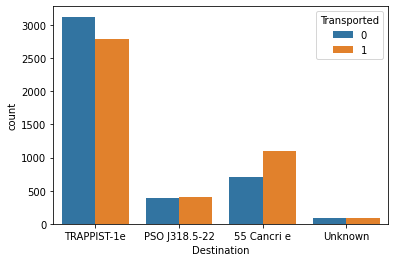

In [35]:
sns.countplot(x='Destination', data=train, hue = 'Transported')

<Axes: xlabel='Money_Spent', ylabel='count'>

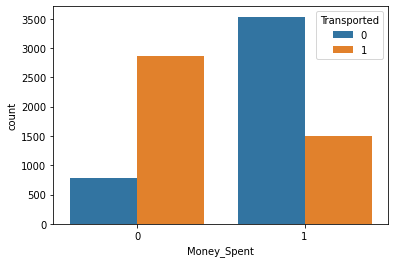

In [36]:
sns.countplot(x='Money_Spent', data=train, hue = 'Transported')

<Axes: xlabel='Use_RoomService', ylabel='count'>

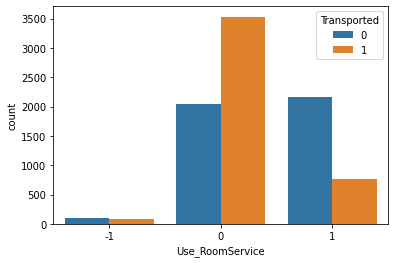

In [37]:
sns.countplot(x='Use_RoomService', data=train, hue = 'Transported')

<Axes: xlabel='Use_Spa', ylabel='count'>

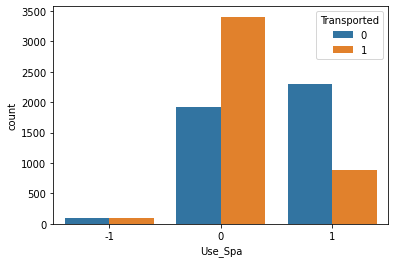

In [38]:
sns.countplot(x='Use_Spa', data=train, hue = 'Transported')

<Axes: xlabel='Use_ShoppingMall', ylabel='count'>

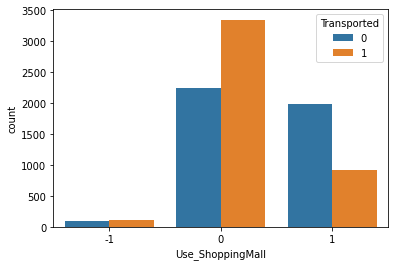

In [39]:
sns.countplot(x='Use_ShoppingMall', data=train, hue = 'Transported')

<Axes: xlabel='Cabin_deck', ylabel='count'>

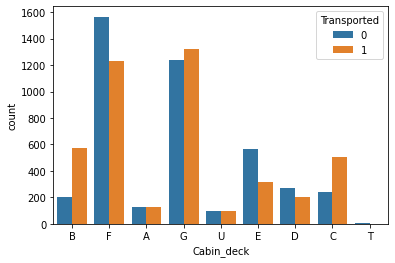

In [40]:
sns.countplot(x='Cabin_deck', data=train, hue = 'Transported')

<Axes: xlabel='Cabin_side', ylabel='count'>

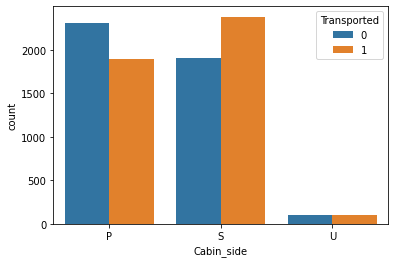

In [41]:
sns.countplot(x='Cabin_side', data=train, hue = 'Transported')

<Axes: xlabel='VIP', ylabel='count'>

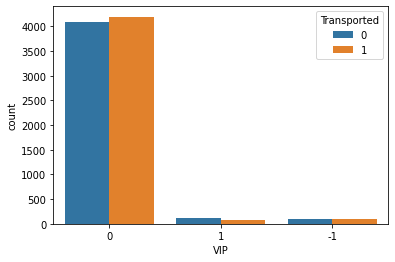

In [43]:
sns.countplot(x='VIP', data=train, hue = 'Transported')

In [75]:
train['Name'] = train['Name'].apply(condition_7)
train['Last_Name'] = train['Name'].map(lambda x: x.split(' ')[1])
names = []
for groups in train['Group_Id'].unique():
    group = train[train['Group_Id']==groups].reset_index(drop = True)
    i = 0
    for i in range(len(group)):
            name = group['Last_Name'].loc[i]
            num_name = len(group[group['Last_Name']==name])
            if name == 'Unknown':
                names.append(-1)
            else:
                names.append(num_name)
train['Group_Name_Size'] = ([int(x) for x in names])

<Axes: xlabel='Group_Name_Size', ylabel='count'>

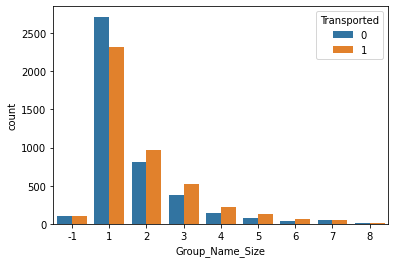

In [47]:
sns.countplot(x='Group_Name_Size', data=train, hue = 'Transported')

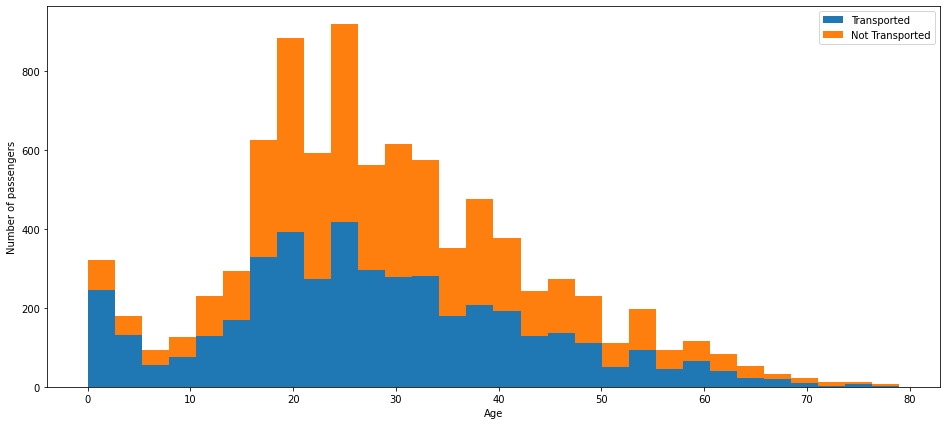

In [48]:
figure = plt.figure(figsize=(16, 7))
plt.hist([train[train['Transported'] == '1']['Age'], train[train['Transported'] == '0']['Age']], 
         stacked=True, bins = 30, label = ['Transported','Not Transported'])
plt.xlabel('Age')
plt.ylabel('Number of passengers')
plt.legend()

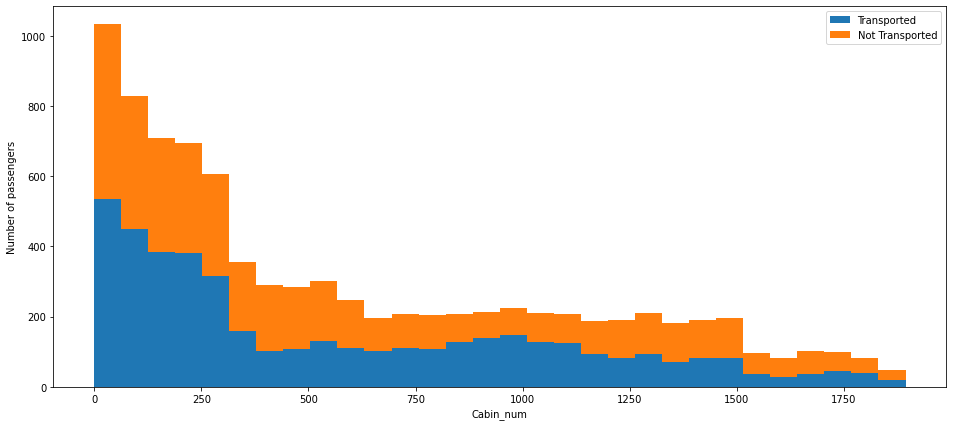

In [49]:
figure = plt.figure(figsize=(16, 7))
plt.hist([train[train['Transported'] == '1']['Cabin_num'], train[train['Transported'] == '0']['Cabin_num']], 
         stacked=True, bins = 30, label = ['Transported','Not Transported'])
plt.xlabel('Cabin_num')
plt.ylabel('Number of passengers')
plt.legend()

Group_Id 0


Text(0, 0.5, 'Ratio')

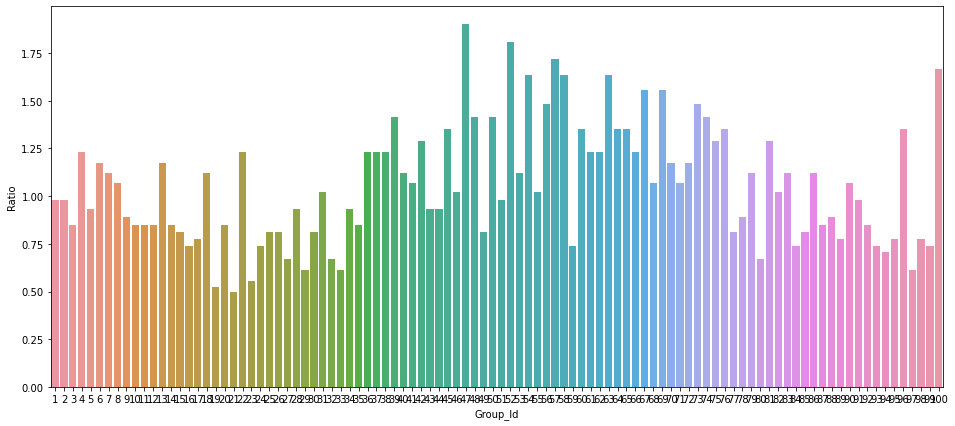

In [50]:
col = 'Group_Id'
eda_plot = train.copy()
eda_plot = eda_plot.sort_values(by = col)
eda_plot = eda_plot.reset_index(drop = True)
buckets = 99
bucket_len = int(len(eda_plot)/buckets)
bucket_num = []
bucks = []
buckets_ratio = []

bucks = [0] * len(eda_plot[eda_plot[col]<= 0])
bucket_len = int((len(eda_plot)-len(bucks))/buckets)
bucket_num = bucket_num + bucks

for b in range(1,buckets+2):
    bucks = [b]*bucket_len
    bucket_num = bucket_num + bucks

eda_plot['Bucket'] = bucket_num[0:len(eda_plot)]


for b in range(np.max(bucket_num)+1):
    buck = eda_plot[eda_plot['Bucket'] ==b]
    if len(buck[buck['Transported']=='0']) == 0 and len(buck[buck['Transported']=='1']) > 0:
        bucket_ratio = 10
        bucks_ratio = [bucket_ratio]*len(buck)
        buckets_ratio = buckets_ratio + bucks_ratio
    elif len(buck[buck['Transported']=='1']) == 0 and len(buck[buck['Transported']=='0']) == 0:
        print(col, b)
    else:
        bucket_ratio = len(buck[buck['Transported']=='1'])/len(buck[buck['Transported']=='0'])
        bucks_ratio = [bucket_ratio]*len(buck)
        buckets_ratio = buckets_ratio + bucks_ratio

eda_plot['Bucket_Ratio'] = buckets_ratio[0:len(eda_plot)]

figure = plt.figure(figsize=(16, 7))
sns.barplot(y='Bucket_Ratio',x='Bucket', data=eda_plot)
plt.xlabel(col)
plt.ylabel('Ratio')

Text(0, 0.5, 'Ratio')

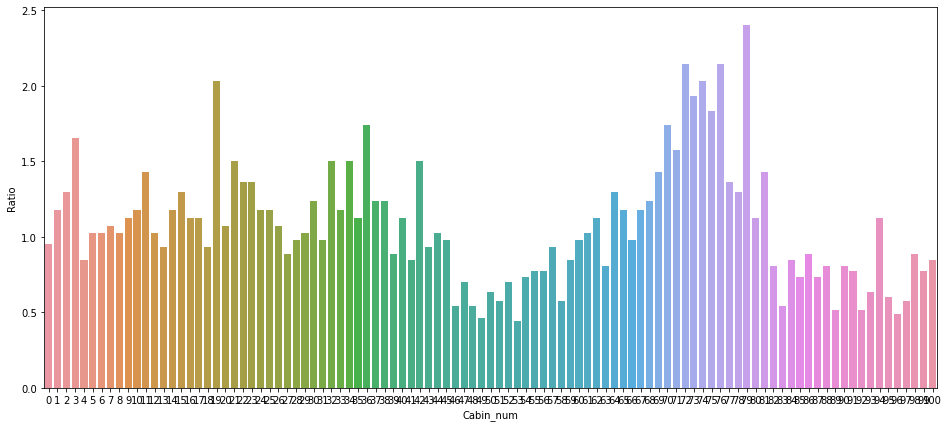

In [51]:

col = 'Cabin_num'
eda_plot = train.copy()
eda_plot = eda_plot.sort_values(by = col)
eda_plot = eda_plot.reset_index(drop = True)
buckets = 99
bucket_len = int(len(eda_plot)/buckets)
bucket_num = []
bucks = []
buckets_ratio = []

bucks = [0] * len(eda_plot[eda_plot[col]<= 0])
bucket_len = int((len(eda_plot)-len(bucks))/buckets)
bucket_num = bucket_num + bucks

for b in range(1,buckets+2):
    bucks = [b]*bucket_len
    bucket_num = bucket_num + bucks

eda_plot['Bucket'] = bucket_num[0:len(eda_plot)]


for b in range(np.max(bucket_num)+1):
    buck = eda_plot[eda_plot['Bucket'] ==b]
    if len(buck[buck['Transported']=='0']) == 0 and len(buck[buck['Transported']=='1']) > 0:
        bucket_ratio = 10
        bucks_ratio = [bucket_ratio]*len(buck)
        buckets_ratio = buckets_ratio + bucks_ratio
    elif len(buck[buck['Transported']=='1']) == 0 and len(buck[buck['Transported']=='0']) == 0:
        print(col, b)
    else:
        bucket_ratio = len(buck[buck['Transported']=='1'])/len(buck[buck['Transported']=='0'])
        bucks_ratio = [bucket_ratio]*len(buck)
        buckets_ratio = buckets_ratio + bucks_ratio

eda_plot['Bucket_Ratio'] = buckets_ratio[0:len(eda_plot)]

figure = plt.figure(figsize=(16, 7))
sns.barplot(y='Bucket_Ratio',x='Bucket', data=eda_plot)
plt.xlabel(col)
plt.ylabel('Ratio')

In [123]:
bucket_maker(train,['Spa'])

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Spa_Bucket
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.00,False,0.00,0.00,0.00,0.00,0.00,Maham Ofracculy,False,0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.00,False,109.00,9.00,25.00,549.00,44.00,Juanna Vines,True,59
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.00,True,43.00,3576.00,0.00,6715.00,49.00,Altark Susent,False,90
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.00,False,0.00,1283.00,371.00,3329.00,193.00,Solam Susent,False,86
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.00,False,303.00,70.00,151.00,565.00,2.00,Willy Santantines,True,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.00,True,0.00,6819.00,0.00,1643.00,74.00,Gravior Noxnuther,False,80
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.00,False,0.00,0.00,0.00,0.00,0.00,Kurta Mondalley,False,0
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.00,False,0.00,0.00,1872.00,1.00,0.00,Fayey Connon,True,4
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.00,False,0.00,1049.00,0.00,353.00,3235.00,Celeon Hontichre,False,53


In [133]:
def bucket_maker(data, col_list):
    eda_plot = data.copy()
    eda_plot = eda_plot.reset_index(drop = False)
    for col in col_list:
        col_name = col+'_Bucket'
        eda_plot = eda_plot.sort_values(by = col)
        eda_plot = eda_plot.reset_index(drop = True)
        buckets = 99
        bucket_len = int(len(eda_plot)/buckets)
        bucket_num = []
        bucks = []
        buckets_ratio = []

        bucks = ['-1'] * len(eda_plot[eda_plot[col]< 0])
        bucket_num = bucket_num + bucks
        
        bucks = ['0'] * len(eda_plot[eda_plot[col]== 0])
        bucket_num = bucket_num + bucks
        
        bucket_len = int((len(eda_plot)-len(bucks))/(buckets-3))
        

        for b in range(1,buckets+3):
            bucks = [str(b)]*bucket_len
            bucket_num = bucket_num + bucks

        eda_plot['Bucket'] = bucket_num[0:len(eda_plot)]
        eda_plot = eda_plot.sort_values(by = 'index')

        data[col_name] = eda_plot['Bucket'].values
    return data

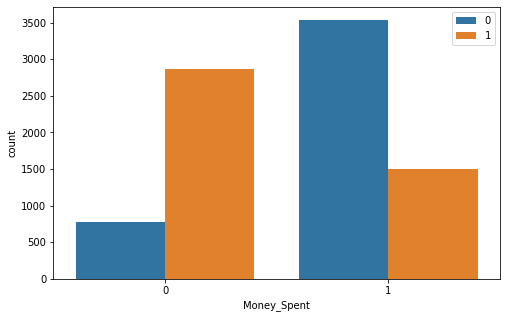

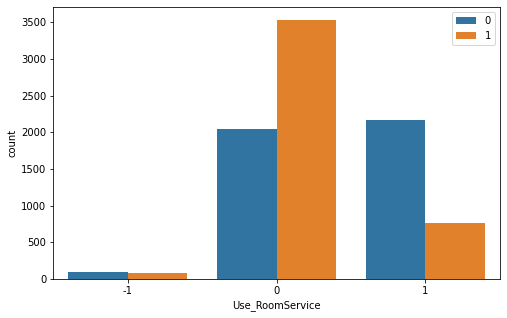

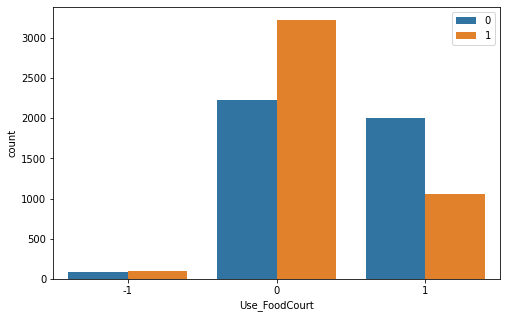

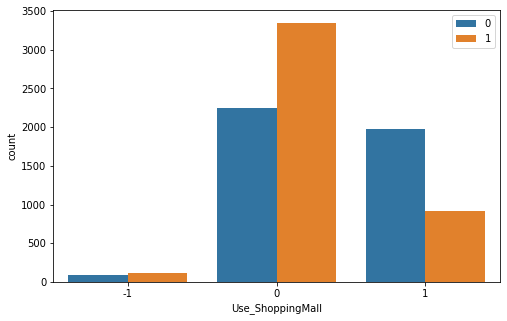

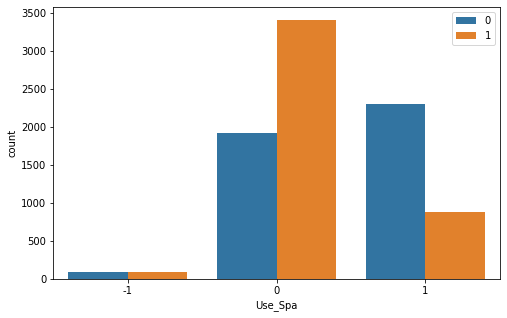

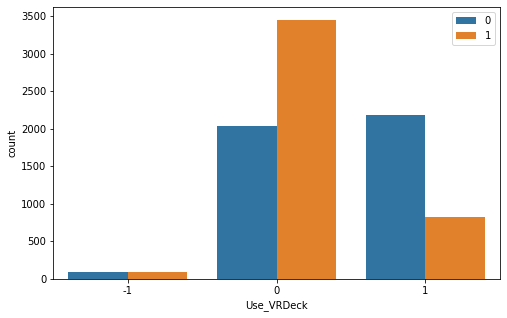

In [52]:
column_headers = ['Money_Spent', 'Use_RoomService','Use_FoodCourt', 'Use_ShoppingMall','Use_Spa', 'Use_VRDeck']
for col in column_headers:
    figure = plt.figure(figsize=(8, 5))
    sns.countplot(x=col, data=train, hue = 'Transported')
    plt.xlabel(col)
    plt.legend()

In [53]:
train.isna().sum()

PassengerId         0
HomePlanet          0
CryoSleep           0
Cabin               0
Destination         0
Age                 0
VIP                 0
RoomService         0
FoodCourt           0
ShoppingMall        0
Spa                 0
VRDeck              0
Name                0
Transported         0
Use_RoomService     0
Use_FoodCourt       0
Use_ShoppingMall    0
Use_Spa             0
Use_VRDeck          0
Cabin_deck          0
Cabin_num           0
Cabin_side          0
Group_Id            0
Id                  0
Total_Spent         0
Money_Spent         0
GroupId_Size        0
Last_Name           0
Group_Name_Size     0
dtype: int64

In [54]:
train = train.drop(['PassengerId','Money_Spent','Cabin', 'Cabin_num','Group_Id', 'Total_Spent', 'Name', 'Last_Name'],axis = 1)

In [52]:
train = pd.get_dummies(train)

In [53]:
train.corr().loc['Transported_0']

Age                          0.07
RoomService                  0.24
FoodCourt                   -0.05
ShoppingMall                -0.01
Spa                          0.22
VRDeck                       0.20
Use_RoomService              0.32
Use_FoodCourt                0.22
Use_ShoppingMall             0.25
Use_Spa                      0.32
Use_VRDeck                   0.31
GroupId_Size                -0.08
Group_Name_Size             -0.08
HomePlanet_Earth             0.17
HomePlanet_Europa           -0.18
HomePlanet_Mars             -0.02
HomePlanet_Unknown          -0.00
CryoSleep_-1                 0.00
CryoSleep_0                  0.45
CryoSleep_1                 -0.46
Destination_55 Cancri e     -0.11
Destination_PSO J318.5-22   -0.00
Destination_TRAPPIST-1e      0.09
Destination_Unknown         -0.00
VIP_-1                      -0.00
VIP_0                       -0.02
VIP_1                        0.04
Transported_0                1.00
Transported_1               -1.00
Cabin_deck_A  

In [134]:
def format_data(data_org):
    data = data_org.copy()
    data['CryoSleep'] = data['CryoSleep'].apply(condition_1)
    data['VIP'] = data['VIP'].apply(condition_1)
    #data['Use_RoomService'] = data['RoomService'].apply(condition_2)
    #data['Use_FoodCourt'] = data['FoodCourt'].apply(condition_2)
    #data['Use_ShoppingMall'] = data['ShoppingMall'].apply(condition_2)
    #data['Use_Spa'] = data['Spa'].apply(condition_2)
    #data['Use_VRDeck'] = data['VRDeck'].apply(condition_2)
    data['Cabin'] = data['Cabin'].apply(condition_3)
    data['Cabin_deck'] = data['Cabin'].map(lambda x: x.split('/')[0])
    data['Cabin_num'] = data['Cabin'].map(lambda x: int(x.split('/')[1]))
    data['Cabin_side'] = data['Cabin'].map(lambda x: x.split('/')[2])
    data['PassengerId'] = data['PassengerId'].apply(condition_4)
    data['Group_Id'] = data['PassengerId'].map(lambda x: int(x.split('_')[0]))
    data['Id'] = data['PassengerId'].map(lambda x: int(x.split('_')[1]))
    data['HomePlanet'] = data['HomePlanet'].apply(condition_5)
    data['Destination'] = data['Destination'].apply(condition_5)

    data['Age'] = data.apply(lambda row: age_aproximate(row, data) if np.isnan(row['Age']) else row['Age'], axis=1)

    
    data['Name'] = data['Name'].apply(condition_7)
    data['Last_Name'] = data['Name'].map(lambda x: x.split(' ')[1])
    names = []
    for groups in data['Group_Id'].unique():
        group = data[data['Group_Id']==groups].reset_index(drop = True)
        i = 0
        for i in range(len(group)):
                name = group['Last_Name'].loc[i]
                num_name = len(group[group['Last_Name']==name])
                if name == 'Unknown':
                    names.append(-1)
                else:
                    names.append(num_name)
    data['Group_Name_Size'] = ([int(x) for x in names])
    data = data.fillna(-1)
    
    col_list = ['RoomService','FoodCourt', 'ShoppingMall','Spa', 'VRDeck', 'Cabin_num', 'Age', 'Cabin_num', 'Group_Id']
    data = bucket_maker(data, col_list)

    data = data.drop(['PassengerId','Cabin', 'Name', 'Last_Name'],axis = 1)
    data = data.drop(col_list, axis = 1)
    data = pd.get_dummies(data)
    
    
    return data

In [135]:
train = train_org.copy()
test=pd.read_csv('test.csv')

In [136]:
ID = test['PassengerId']

In [137]:
train_len = len(train)

In [138]:
bool_y = train['Transported'].values
y=[]
for i in bool_y:
    if i:
        y.append(1)
    else:
        y.append(0)

In [139]:
combined = pd.concat([train.drop(['Transported'], axis = 1), test]).reset_index(drop = True)

In [140]:
processed = format_data(combined)

In [141]:
processed

,Id,Group_Name_Size,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,HomePlanet_Unknown,CryoSleep_-1,CryoSleep_0,CryoSleep_1,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Destination_Unknown,VIP_-1,VIP_0,VIP_1,Cabin_deck_A,Cabin_deck_B,Cabin_deck_C,Cabin_deck_D,Cabin_deck_E,Cabin_deck_F,Cabin_deck_G,Cabin_deck_T,Cabin_deck_U,Cabin_side_P,Cabin_side_S,Cabin_side_U,RoomService_Bucket_-1,RoomService_Bucket_0,RoomService_Bucket_1,RoomService_Bucket_10,RoomService_Bucket_11,RoomService_Bucket_12,RoomService_Bucket_13,RoomService_Bucket_14,RoomService_Bucket_15,RoomService_Bucket_16,RoomService_Bucket_17,RoomService_Bucket_18,RoomService_Bucket_19,RoomService_Bucket_2,RoomService_Bucket_20,RoomService_Bucket_21,RoomService_Bucket_22,RoomService_Bucket_23,RoomService_Bucket_24,RoomService_Bucket_25,RoomService_Bucket_26,RoomService_Bucket_27,RoomService_Bucket_28,RoomService_Bucket_29,RoomService_Bucket_3,RoomService_Bucket_30,RoomService_Bucket_31,RoomService_Bucket_32,RoomService_Bucket_33,RoomService_Bucket_34,RoomService_Bucket_35,RoomService_Bucket_36,RoomService_Bucket_37,RoomService_Bucket_38,RoomService_Bucket_39,RoomService_Bucket_4,RoomService_Bucket_40,RoomService_Bucket_41,RoomService_Bucket_42,RoomService_Bucket_43,RoomService_Bucket_44,RoomService_Bucket_45,RoomService_Bucket_46,RoomService_Bucket_47,RoomService_Bucket_48,RoomService_Bucket_49,RoomService_Bucket_5,RoomService_Bucket_50,RoomService_Bucket_51,RoomService_Bucket_52,RoomService_Bucket_53,RoomService_Bucket_54,RoomService_Bucket_55,RoomService_Bucket_56,RoomService_Bucket_57,RoomService_Bucket_58,RoomService_Bucket_59,RoomService_Bucket_6,RoomService_Bucket_60,RoomService_Bucket_61,RoomService_Bucket_62,RoomService_Bucket_63,RoomService_Bucket_64,RoomService_Bucket_65,RoomService_Bucket_66,RoomService_Bucket_67,RoomService_Bucket_68,RoomService_Bucket_69,RoomService_Bucket_7,RoomService_Bucket_70,RoomService_Bucket_71,RoomService_Bucket_72,RoomService_Bucket_73,RoomService_Bucket_74,RoomService_Bucket_75,RoomService_Bucket_76,RoomService_Bucket_77,RoomService_Bucket_78,RoomService_Bucket_79,RoomService_Bucket_8,RoomService_Bucket_80,RoomService_Bucket_81,RoomService_Bucket_82,RoomService_Bucket_83,RoomService_Bucket_84,RoomService_Bucket_85,RoomService_Bucket_86,RoomService_Bucket_87,RoomService_Bucket_88,RoomService_Bucket_89,RoomService_Bucket_9,RoomService_Bucket_90,RoomService_Bucket_91,RoomService_Bucket_92,FoodCourt_Bucket_-1,FoodCourt_Bucket_0,FoodCourt_Bucket_1,FoodCourt_Bucket_10,FoodCourt_Bucket_11,FoodCourt_Bucket_12,FoodCourt_Bucket_13,FoodCourt_Bucket_14,FoodCourt_Bucket_15,FoodCourt_Bucket_16,FoodCourt_Bucket_17,FoodCourt_Bucket_18,FoodCourt_Bucket_19,FoodCourt_Bucket_2,FoodCourt_Bucket_20,FoodCourt_Bucket_21,FoodCourt_Bucket_22,FoodCourt_Bucket_23,FoodCourt_Bucket_24,FoodCourt_Bucket_25,FoodCourt_Bucket_26,FoodCourt_Bucket_27,FoodCourt_Bucket_28,FoodCourt_Bucket_29,FoodCourt_Bucket_3,FoodCourt_Bucket_30,FoodCourt_Bucket_31,FoodCourt_Bucket_32,FoodCourt_Bucket_33,FoodCourt_Bucket_34,FoodCourt_Bucket_35,FoodCourt_Bucket_36,FoodCourt_Bucket_37,FoodCourt_Bucket_38,FoodCourt_Bucket_39,FoodCourt_Bucket_4,FoodCourt_Bucket_40,FoodCourt_Bucket_41,FoodCourt_Bucket_42,FoodCourt_Bucket_43,FoodCourt_Bucket_44,FoodCourt_Bucket_45,FoodCourt_Bucket_46,FoodCourt_Bucket_47,FoodCourt_Bucket_48,FoodCourt_Bucket_49,FoodCourt_Bucket_5,FoodCourt_Bucket_50,FoodCourt_Bucket_51,FoodCourt_Bucket_52,FoodCourt_Bucket_53,FoodCourt_Bucket_54,FoodCourt_Bucket_55,FoodCourt_Bucket_56,FoodCourt_Bucket_57,FoodCourt_Bucket_58,FoodCourt_Bucket_59,FoodCourt_Bucket_6,FoodCourt_Bucket_60,FoodCourt_Bucket_61,FoodCourt_Bucket_62,FoodCourt_Bucket_63,FoodCourt_Bucket_64,FoodCourt_Bucket_65,FoodCourt_Bucket_66,FoodCourt_Bucket_67,FoodCourt_Bucket_68,FoodCourt_Bucket_69,FoodCourt_Bucket_7,FoodCourt_Bucket_70,FoodCourt_Bucket_71,FoodCourt_Bucket_72,FoodCourt_Bucket_73,FoodCourt_Bucket_74,FoodCourt_Bucket_75,FoodCourt_Bucket_76,FoodCourt_Bucket_77,FoodCourt_Buck

In [142]:
train_processed = processed.loc[0:train_len-1]
test_processed = processed.loc[train_len::].reset_index(drop = True)

In [143]:
X = train_processed

In [144]:
X_train_full, X_test_full, y_train, y_test = train_test_split(X, y,test_size=.2, stratify = y,random_state =123)

In [145]:
RFC_feature_finder = RandomForestClassifier(random_state=42).fit(X_train_full, y_train)

In [146]:
accuracy_score(RFC_feature_finder.predict(X_test_full), y_test)

0.7607820586543991

In [147]:
features = pd.DataFrame()
features['feature'] = X_train_full.columns
features['importance'] = RFC_feature_finder.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

<Axes: ylabel='feature'>

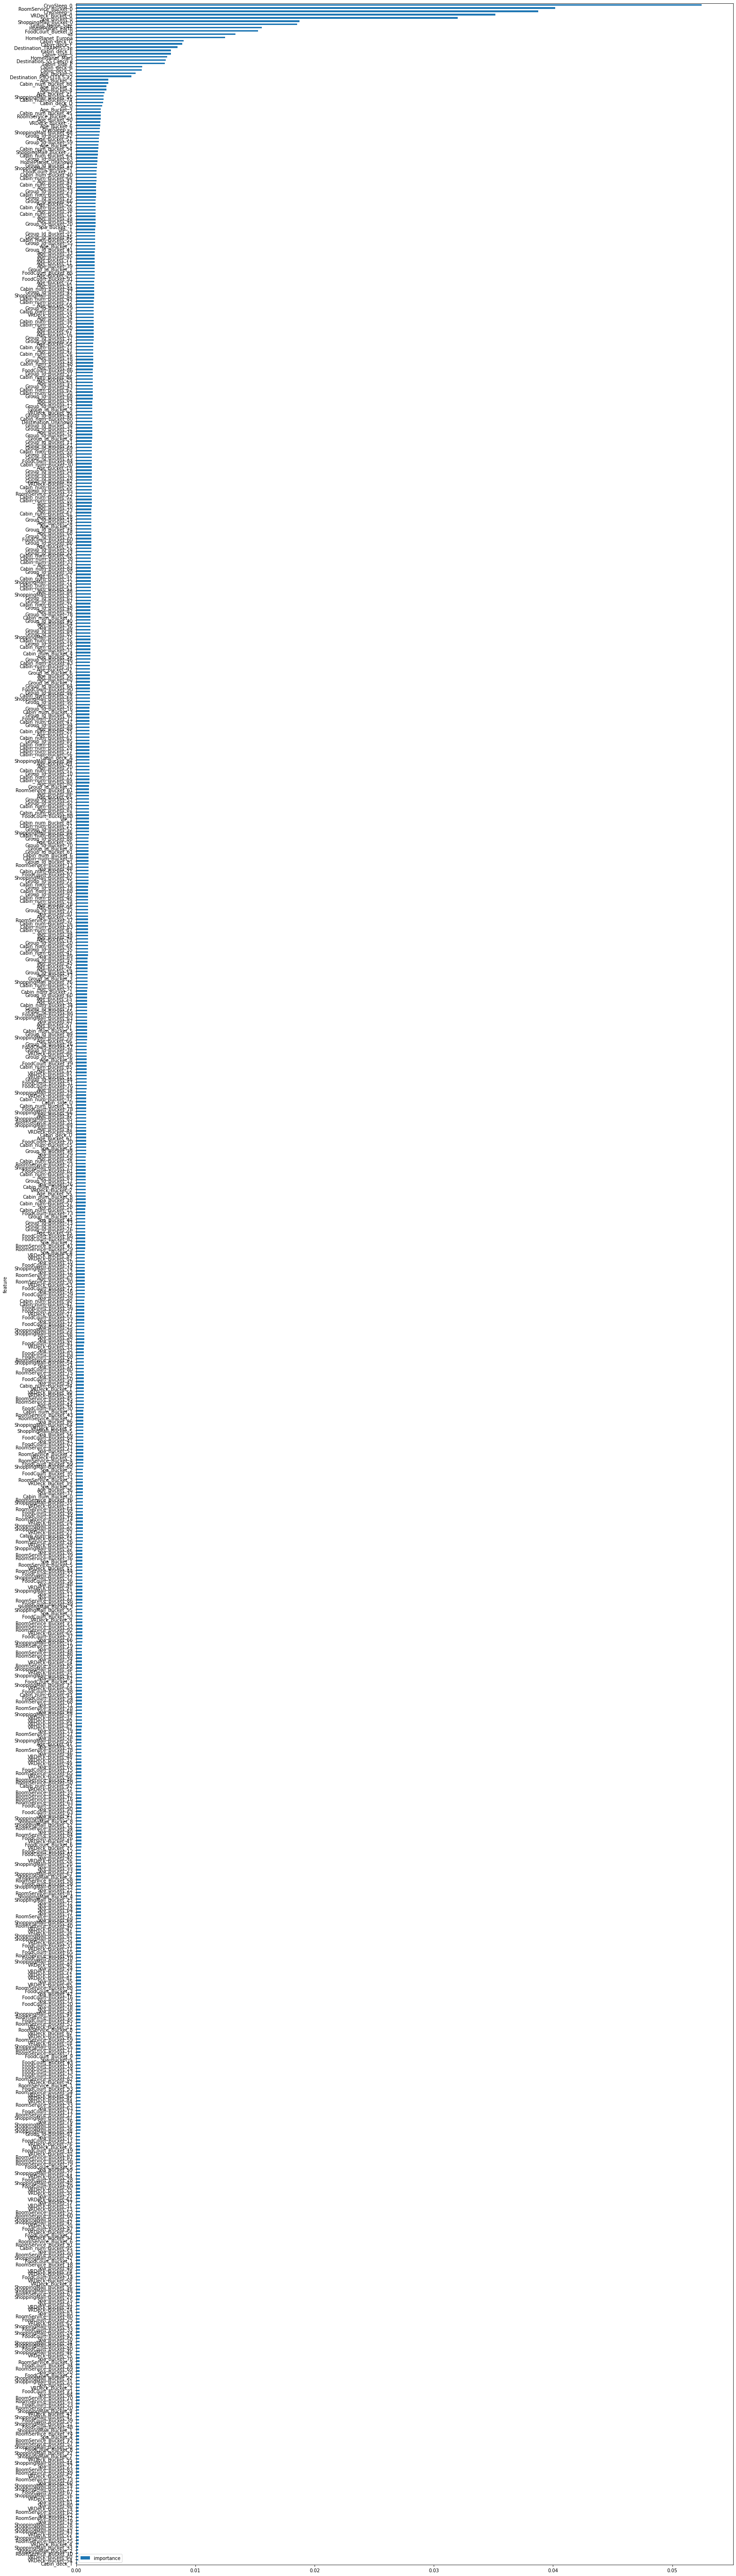

In [150]:
features.plot(kind='barh', figsize=(25, 100))

In [149]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None, random_state = 42)
models,predictions = clf.fit(X_train_full, X_test_full, y_train, y_test)
models

100%|██████████| 29/29 [02:03<00:00,  4.25s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
XGBClassifier,0.79,0.79,0.79,0.79,2.50
LGBMClassifier,0.79,0.79,0.79,0.79,0.78
RidgeClassifierCV,0.78,0.78,0.78,0.78,0.75
LinearDiscriminantAnalysis,0.78,0.77,0.77,0.77,1.07
RidgeClassifier,0.78,0.77,0.77,0.77,0.35
CalibratedClassifierCV,0.77,0.77,0.77,0.77,38.26
NuSVC,0.77,0.77,0.77,0.77,20.35
LogisticRegression,0.77,0.77,0.77,0.77,0.50
ExtraTreesClassifier,0.77,0.77,0.77,0.77,4.60


In [151]:
from sklearn.feature_selection import SelectFromModel
model_feature = SelectFromModel(RFC_feature_finder, prefit=True)
X_train = model_feature.transform(X_train_full)
X_test = model_feature.transform(X_test_full)

In [152]:
X.columns.values

array(['Id', 'Group_Name_Size', 'HomePlanet_Earth', 'HomePlanet_Europa',
       'HomePlanet_Mars', 'HomePlanet_Unknown', 'CryoSleep_-1',
       'CryoSleep_0', 'CryoSleep_1', 'Destination_55 Cancri e',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e',
       'Destination_Unknown', 'VIP_-1', 'VIP_0', 'VIP_1', 'Cabin_deck_A',
       'Cabin_deck_B', 'Cabin_deck_C', 'Cabin_deck_D', 'Cabin_deck_E',
       'Cabin_deck_F', 'Cabin_deck_G', 'Cabin_deck_T', 'Cabin_deck_U',
       'Cabin_side_P', 'Cabin_side_S', 'Cabin_side_U',
       'RoomService_Bucket_-1', 'RoomService_Bucket_0',
       'RoomService_Bucket_1', 'RoomService_Bucket_10',
       'RoomService_Bucket_11', 'RoomService_Bucket_12',
       'RoomService_Bucket_13', 'RoomService_Bucket_14',
       'RoomService_Bucket_15', 'RoomService_Bucket_16',
       'RoomService_Bucket_17', 'RoomService_Bucket_18',
       'RoomService_Bucket_19', 'RoomService_Bucket_2',
       'RoomService_Bucket_20', 'RoomService_Bucket_21',
       'Room

In [153]:
X_train.shape

(6954, 166)

In [154]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None, random_state = 42)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 29/29 [00:37<00:00,  1.31s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.76,0.76,0.76,0.76,0.27
LinearDiscriminantAnalysis,0.76,0.76,0.76,0.76,0.19
RidgeClassifier,0.76,0.76,0.76,0.76,0.07
RidgeClassifierCV,0.76,0.76,0.76,0.76,0.13
XGBClassifier,0.76,0.76,0.76,0.76,0.65
LinearSVC,0.75,0.75,0.75,0.75,2.90
LogisticRegression,0.75,0.75,0.75,0.75,0.11
CalibratedClassifierCV,0.75,0.75,0.75,0.75,11.26
AdaBoostClassifier,0.75,0.75,0.75,0.75,0.68


In [155]:
from sklearn.feature_selection import SelectFromModel
model_feature = SelectFromModel(RFC_feature_finder, prefit=True, max_features = 20)
X_train = model_feature.transform(X_train_full)
X_test = model_feature.transform(X_test_full)

In [156]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None, random_state = 42)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 29/29 [00:15<00:00,  1.89it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
SVC,0.75,0.75,0.75,0.75,2.21
LinearDiscriminantAnalysis,0.75,0.75,0.75,0.75,0.04
RidgeClassifierCV,0.75,0.75,0.75,0.75,0.02
RidgeClassifier,0.75,0.75,0.75,0.75,0.02
NuSVC,0.74,0.75,0.75,0.74,2.76
LinearSVC,0.74,0.74,0.74,0.74,0.49
LGBMClassifier,0.74,0.74,0.74,0.74,0.15
LogisticRegression,0.74,0.74,0.74,0.74,0.04
CalibratedClassifierCV,0.74,0.74,0.74,0.74,1.92


In [ ]:
from sklearn.feature_selection import SelectFromModel
model_feature = SelectFromModel(RFC_feature_finder, prefit=True, max_features = 3)
X_train = model_feature.transform(X_train_full)
X_test = model_feature.transform(X_test_full)

In [79]:
X_train = X_train_full
X_test = X_test_full

In [80]:
def threashold_finder(prob, test):
    threasholds = arange(0.6,0.4005,-0.001)
    model_best_acc = 0
    model_best_F1 = 0
    model_threashold = 0
    same = []
    for t in threasholds:
        pred = []
        for p in prob[:,1]:
            if p>t:
                pred.append(1)
            else:
                pred.append(0)
        acc = accuracy_score(test, pred)
        F1 = f1_score(test, pred)

        if acc-model_best_acc>0.0001:
            same = []
            model_best_acc = acc
            model_best_F1 = F1
            model_threashold = t
            same.append(t)
        elif abs(acc-model_best_acc)<0.0001:
            if F1-model_best_F1>0.0001:
                same = []
                model_best_F1 = F1
                model_threashold = t
                same.append(t)
            elif abs(F1-model_best_F1)<0.0001:
                same.append(t)
    stop = -1
    if len(same)>1:
        for i in range(len(same)-1):
            if same[i]-same[i+1]>0.001:
                stop = i+1
    if stop!=-1:
        threashold = same[0:stop]
    else:
        threashold = same
    
    avg_threashold = np.mean(threashold)
    
    pred = []
    for p in prob[:,1]:
        if p>avg_threashold:
            pred.append(1)
        else:
            pred.append(0)
    model_avg_acc=accuracy_score(test, pred)
    model_avg_F1 = f1_score(test, pred)
    
    matrix = pd.crosstab(test, pred,rownames=['Actual'], colnames=['Predicted'], margins=True)
    
    print("Accuracy: " ,model_avg_acc)
    print("F1 Score: " ,model_avg_F1)
    print("Threashold: " ,avg_threashold)
    
    return pred, matrix,model_avg_acc, model_best_F1, avg_threashold

In [81]:
param_LOG = { 
    'solver': Categorical(['lbfgs','liblinear']),
    'C':Real(1e-6, 1e+1, prior='log-uniform'),
    'fit_intercept':Categorical([True,False])
}

In [82]:
LOG_grid=LogisticRegression(penalty = 'l2',max_iter = 1000, random_state=42)
LOG_clf = BayesSearchCV(estimator=LOG_grid, search_spaces=param_LOG, cv= 5, scoring = 'accuracy',n_iter = 50, n_points = 5,error_score = 1, n_jobs = 10)

In [83]:
LOG_clf.fit(X_train, y_train)

BayesSearchCV(cv=5, error_score=1,
              estimator=LogisticRegression(max_iter=1000, random_state=42),
              n_jobs=10, n_points=5, scoring='accuracy',
              search_spaces={'C': Real(low=1e-06, high=10.0, prior='log-uniform', transform='normalize'),
                             'fit_intercept': Categorical(categories=(True, False), prior=None),
                             'solver': Categorical(categories=('lbfgs', 'liblinear'), prior=None)})

In [84]:
LOG_prob = LOG_clf.predict_proba(X_test)

In [85]:
print("Logistic Regression Classifier")
LOG_pred, LOG_confusion, LOG_best_acc, LOG_best_F1, LOG_threashold = threashold_finder(LOG_prob,y_test)
LOG_confusion

Logistic Regression Classifier
Accuracy:  0.7998849913743531
F1 Score:  0.8094194961664841
Threashold:  0.5149999999999999


Predicted,0,1,All
Actual,,,
0,652,211,863
1,137,739,876
All,789,950,1739


In [118]:
param_XGB = {
        'learning_rate': Real(0.01, 1.0, 'log-uniform'),
        'n_estimators': Integer(30, 5000),
        'min_child_weight': Real(0.01, 10.0, 'uniform'),
        'gamma': Real(0.01, 10.0, 'uniform'),
        'subsample': Real(0.01, 1.0, 'uniform'),
        'colsample_bytree': Real(0.01, 1.0, 'uniform'),
        'max_depth': Integer(1, 256)
        }

In [119]:
XGB_grid=XGBClassifier(objective='binary:logistic', verbosity=0)
XGB_clf = BayesSearchCV(estimator=XGB_grid, search_spaces=param_XGB, cv= 5, scoring = 'accuracy',n_iter = 50, n_points = 5,error_score = 1, n_jobs = 10)

In [120]:
XGB_clf.fit(X_train, y_train)

BayesSearchCV(cv=5, error_score=1,
              estimator=XGBClassifier(base_score=None, booster=None,
                                      callbacks=None, colsample_bylevel=None,
                                      colsample_bynode=None,
                                      colsample_bytree=None,
                                      early_stopping_rounds=None,
                                      enable_categorical=False,
                                      eval_metric=None, feature_types=None,
                                      gamma=None, gpu_id=None, grow_policy=None,
                                      importance_type=None,
                                      interaction_constraints=None,
                                      lear...
                             'learning_rate': Real(low=0.01, high=1.0, prior='log-uniform', transform='normalize'),
                             'max_depth': Integer(low=1, high=256, prior='uniform', transform='normalize'),
           

In [121]:
XGB_prob = XGB_clf.predict_proba(X_test)

In [122]:
print("XGBoost Classifier")
XGB_pred, XGB_confusion, XGB_best_acc, XGB_best_F1, XGB_threashold = threashold_finder(XGB_prob, y_test)

XGBoost Classifier
Accuracy:  0.8188614146060954
F1 Score:  0.8264462809917357
Threashold:  0.47299999999999986


In [92]:
param_LGBM = {
    'learning_rate': Real(0.01, 1.0, 'log-uniform'),    
    'n_estimators': Integer(30, 5000),                  
    'num_leaves': Integer(2, 512),                       
    'max_depth': Integer(-1, 256),                       
    'min_child_samples': Integer(1, 256),               
    'max_bin': Integer(100, 1000),                      
    'subsample': Real(0.01, 1.0, 'uniform'),          
    'subsample_freq': Integer(0, 10),                   
    'colsample_bytree': Real(0.01, 1.0, 'uniform'),      
    'min_child_weight': Real(0.01, 10.0, 'uniform'),     
    'reg_lambda': Real(1e-9, 100.0, 'log-uniform'),     
    'reg_alpha': Real(1e-9, 100.0, 'log-uniform'),      
    'scale_pos_weight': Real(1.0, 500.0, 'uniform'),     
        }

In [93]:
LGBM_grid = lgbm.LGBMClassifier(boosting_type='gbdt',metric='accuracy',objective='binary',n_iter = 50, n_points = 5,error_score = 1, n_jobs = 10)
LGBM_clf = BayesSearchCV(estimator=LGBM_grid, search_spaces=param_LGBM, cv= 5, scoring = 'accuracy',error_score = 1)

In [94]:
LGBM_clf.fit(X_train, y_train)

[LightGBM] [Warning] Unknown parameter: n_points
[LightGBM] [Warning] Unknown parameter: error_score
[LightGBM] [Warning] num_iterations is set=50, n_iter=50 will be ignored. Current value: num_iterations=50
[LightGBM] [Warning] Unknown parameter: n_points
[LightGBM] [Warning] Unknown parameter: error_score
[LightGBM] [Warning] num_iterations is set=50, n_iter=50 will be ignored. Current value: num_iterations=50
[LightGBM] [Warning] Unknown parameter: n_points
[LightGBM] [Warning] Unknown parameter: error_score
[LightGBM] [Warning] num_iterations is set=50, n_iter=50 will be ignored. Current value: num_iterations=50
[LightGBM] [Warning] Unknown parameter: n_points
[LightGBM] [Warning] Unknown parameter: error_score
[LightGBM] [Warning] num_iterations is set=50, n_iter=50 will be ignored. Current value: num_iterations=50
[LightGBM] [Warning] Unknown parameter: n_points
[LightGBM] [Warning] Unknown parameter: error_score
[LightGBM] [Warning] num_iterations is set=50, n_iter=50 will be ig

[LightGBM] [Warning] Unknown parameter: n_points
[LightGBM] [Warning] Unknown parameter: error_score
[LightGBM] [Warning] num_iterations is set=50, n_iter=50 will be ignored. Current value: num_iterations=50
[LightGBM] [Warning] Unknown parameter: n_points
[LightGBM] [Warning] Unknown parameter: error_score
[LightGBM] [Warning] num_iterations is set=50, n_iter=50 will be ignored. Current value: num_iterations=50
[LightGBM] [Warning] Unknown parameter: n_points
[LightGBM] [Warning] Unknown parameter: error_score
[LightGBM] [Warning] num_iterations is set=50, n_iter=50 will be ignored. Current value: num_iterations=50
[LightGBM] [Warning] Unknown parameter: n_points
[LightGBM] [Warning] Unknown parameter: error_score
[LightGBM] [Warning] num_iterations is set=50, n_iter=50 will be ignored. Current value: num_iterations=50
[LightGBM] [Warning] Unknown parameter: n_points
[LightGBM] [Warning] Unknown parameter: error_score
[LightGBM] [Warning] num_iterations is set=50, n_iter=50 will be ig

[LightGBM] [Warning] Unknown parameter: n_points
[LightGBM] [Warning] Unknown parameter: error_score
[LightGBM] [Warning] num_iterations is set=50, n_iter=50 will be ignored. Current value: num_iterations=50
[LightGBM] [Warning] Unknown parameter: n_points
[LightGBM] [Warning] Unknown parameter: error_score
[LightGBM] [Warning] num_iterations is set=50, n_iter=50 will be ignored. Current value: num_iterations=50
[LightGBM] [Warning] Unknown parameter: n_points
[LightGBM] [Warning] Unknown parameter: error_score
[LightGBM] [Warning] num_iterations is set=50, n_iter=50 will be ignored. Current value: num_iterations=50
[LightGBM] [Warning] Unknown parameter: n_points
[LightGBM] [Warning] Unknown parameter: error_score
[LightGBM] [Warning] num_iterations is set=50, n_iter=50 will be ignored. Current value: num_iterations=50
[LightGBM] [Warning] Unknown parameter: n_points
[LightGBM] [Warning] Unknown parameter: error_score
[LightGBM] [Warning] num_iterations is set=50, n_iter=50 will be ig

[LightGBM] [Warning] Unknown parameter: n_points
[LightGBM] [Warning] Unknown parameter: error_score
[LightGBM] [Warning] num_iterations is set=50, n_iter=50 will be ignored. Current value: num_iterations=50
[LightGBM] [Warning] Unknown parameter: n_points
[LightGBM] [Warning] Unknown parameter: error_score
[LightGBM] [Warning] num_iterations is set=50, n_iter=50 will be ignored. Current value: num_iterations=50
[LightGBM] [Warning] Unknown parameter: n_points
[LightGBM] [Warning] Unknown parameter: error_score
[LightGBM] [Warning] num_iterations is set=50, n_iter=50 will be ignored. Current value: num_iterations=50
[LightGBM] [Warning] Unknown parameter: n_points
[LightGBM] [Warning] Unknown parameter: error_score
[LightGBM] [Warning] num_iterations is set=50, n_iter=50 will be ignored. Current value: num_iterations=50
[LightGBM] [Warning] Unknown parameter: n_points
[LightGBM] [Warning] Unknown parameter: error_score
[LightGBM] [Warning] num_iterations is set=50, n_iter=50 will be ig

[LightGBM] [Warning] Unknown parameter: n_points
[LightGBM] [Warning] Unknown parameter: error_score
[LightGBM] [Warning] num_iterations is set=50, n_iter=50 will be ignored. Current value: num_iterations=50
[LightGBM] [Warning] Unknown parameter: n_points
[LightGBM] [Warning] Unknown parameter: error_score
[LightGBM] [Warning] num_iterations is set=50, n_iter=50 will be ignored. Current value: num_iterations=50
[LightGBM] [Warning] Unknown parameter: n_points
[LightGBM] [Warning] Unknown parameter: error_score
[LightGBM] [Warning] num_iterations is set=50, n_iter=50 will be ignored. Current value: num_iterations=50
[LightGBM] [Warning] Unknown parameter: n_points
[LightGBM] [Warning] Unknown parameter: error_score
[LightGBM] [Warning] num_iterations is set=50, n_iter=50 will be ignored. Current value: num_iterations=50
[LightGBM] [Warning] Unknown parameter: n_points
[LightGBM] [Warning] Unknown parameter: error_score
[LightGBM] [Warning] num_iterations is set=50, n_iter=50 will be ig

[LightGBM] [Warning] Unknown parameter: n_points
[LightGBM] [Warning] Unknown parameter: error_score
[LightGBM] [Warning] num_iterations is set=50, n_iter=50 will be ignored. Current value: num_iterations=50
[LightGBM] [Warning] Unknown parameter: n_points
[LightGBM] [Warning] Unknown parameter: error_score
[LightGBM] [Warning] num_iterations is set=50, n_iter=50 will be ignored. Current value: num_iterations=50
[LightGBM] [Warning] Unknown parameter: n_points
[LightGBM] [Warning] Unknown parameter: error_score
[LightGBM] [Warning] num_iterations is set=50, n_iter=50 will be ignored. Current value: num_iterations=50
[LightGBM] [Warning] Unknown parameter: n_points
[LightGBM] [Warning] Unknown parameter: error_score
[LightGBM] [Warning] num_iterations is set=50, n_iter=50 will be ignored. Current value: num_iterations=50
[LightGBM] [Warning] Unknown parameter: n_points
[LightGBM] [Warning] Unknown parameter: error_score
[LightGBM] [Warning] num_iterations is set=50, n_iter=50 will be ig

[LightGBM] [Warning] Unknown parameter: n_points
[LightGBM] [Warning] Unknown parameter: error_score
[LightGBM] [Warning] num_iterations is set=50, n_iter=50 will be ignored. Current value: num_iterations=50
[LightGBM] [Warning] Unknown parameter: n_points
[LightGBM] [Warning] Unknown parameter: error_score
[LightGBM] [Warning] num_iterations is set=50, n_iter=50 will be ignored. Current value: num_iterations=50
[LightGBM] [Warning] Unknown parameter: n_points
[LightGBM] [Warning] Unknown parameter: error_score
[LightGBM] [Warning] num_iterations is set=50, n_iter=50 will be ignored. Current value: num_iterations=50
[LightGBM] [Warning] Unknown parameter: n_points
[LightGBM] [Warning] Unknown parameter: error_score
[LightGBM] [Warning] num_iterations is set=50, n_iter=50 will be ignored. Current value: num_iterations=50
[LightGBM] [Warning] Unknown parameter: n_points
[LightGBM] [Warning] Unknown parameter: error_score
[LightGBM] [Warning] num_iterations is set=50, n_iter=50 will be ig

BayesSearchCV(cv=5, error_score=1,
              estimator=LGBMClassifier(error_score=1, metric='accuracy',
                                       n_iter=50, n_jobs=10, n_points=5,
                                       objective='binary'),
              scoring='accuracy',
              search_spaces={'colsample_bytree': Real(low=0.01, high=1.0, prior='uniform', transform='normalize'),
                             'learning_rate': Real(low=0.01, high=1.0, prior='log-uniform', transform='normalize'),
                             'max_bin': In...
                             'reg_alpha': Real(low=1e-09, high=100.0, prior='log-uniform', transform='normalize'),
                             'reg_lambda': Real(low=1e-09, high=100.0, prior='log-uniform', transform='normalize'),
                             'scale_pos_weight': Real(low=1.0, high=500.0, prior='uniform', transform='normalize'),
                             'subsample': Real(low=0.01, high=1.0, prior='uniform', transform='normal

In [95]:
LGBM_prob = LGBM_clf.predict_proba(X_test)

In [96]:
print("LightGBM Classifier")
LGBM_pred, LGBM_confusion, LGBM_best_acc, LGBM_best_F1, LGBM_threashold = threashold_finder(LGBM_prob, y_test)
LGBM_confusion

LightGBM Classifier
Accuracy:  0.8154111558366878
F1 Score:  0.8130460104834012
Threashold:  0.5559999999999999


Predicted,0,1,All
Actual,,,
0,720,143,863
1,178,698,876
All,898,841,1739


In [97]:
param_RFC = { 
    'n_estimators': Integer(30, 5000),
    'max_features': Real(0.01, 1, 'uniform'),
    'criterion' :Categorical(['gini', 'entropy']),                
    'max_depth': Integer(1, 20),                  
    'min_samples_split': Real(0.01, 0.49999, 'uniform'),
    'min_samples_leaf': Real(0.01, 0.499999, 'uniform'),      
    'bootstrap' : Categorical(['True', 'False']),        
    'ccp_alpha': Real(0.01, 0.9999, 'uniform'),     
}

In [98]:
RFC=RandomForestClassifier(random_state=42)
RFC_clf = BayesSearchCV(estimator=RFC, search_spaces=param_RFC, cv= 5, scoring = 'accuracy',n_iter = 50, n_points = 5,error_score = 1, n_jobs = 10)

In [99]:
RFC_clf.fit(X_train, y_train)

BayesSearchCV(cv=5, error_score=1,
              estimator=RandomForestClassifier(random_state=42), n_jobs=10,
              n_points=5, scoring='accuracy',
              search_spaces={'bootstrap': Categorical(categories=('True', 'False'), prior=None),
                             'ccp_alpha': Real(low=0.01, high=0.9999, prior='uniform', transform='normalize'),
                             'criterion': Categorical(categories=('gini', 'entropy'), prior=None),
                             'max_...transform='normalize'),
                             'max_features': Real(low=0.01, high=1, prior='uniform', transform='normalize'),
                             'min_samples_leaf': Real(low=0.01, high=0.499999, prior='uniform', transform='normalize'),
                             'min_samples_split': Real(low=0.01, high=0.49999, prior='uniform', transform='normalize'),
                             'n_estimators': Integer(low=30, high=5000, prior='uniform', transform='normalize')})

In [100]:
param_RFC_boot = { 
    'max_features': Real(0.01, 1, 'uniform'),              
    'max_depth': Integer(1, 30),                              
    'ccp_alpha': Real(0.01, 0.9999, 'uniform'),     
}

In [101]:
RFC=RandomForestClassifier(random_state=42, bootstrap = True)
RFC_clf = BayesSearchCV(estimator=RFC, search_spaces=param_RFC_boot, cv= 5, scoring = 'accuracy',n_iter = 50, n_points = 5,error_score = 1, n_jobs = 10)

In [102]:
RFC_clf.fit(X_train, y_train)

BayesSearchCV(cv=5, error_score=1,
              estimator=RandomForestClassifier(random_state=42), n_jobs=10,
              n_points=5, scoring='accuracy',
              search_spaces={'ccp_alpha': Real(low=0.01, high=0.9999, prior='uniform', transform='normalize'),
                             'max_depth': Integer(low=1, high=30, prior='uniform', transform='normalize'),
                             'max_features': Real(low=0.01, high=1, prior='uniform', transform='normalize')})

In [103]:
RFC_prob = RFC_clf.predict_proba(X_test)

In [104]:
print("Random Forest Classifier")
RFC_pred, RFC_confusion, RFC_best_acc, RFC_best_F1, RFC_threashold = threashold_finder(RFC_prob,y_test)
RFC_confusion

Random Forest Classifier
Accuracy:  0.7855089131684876
F1 Score:  0.7910364145658263
Threashold:  0.5279999999999999


Predicted,0,1,All
Actual,,,
0,660,203,863
1,170,706,876
All,830,909,1739


In [105]:
param_RFC_boot = { 
    'max_features': Real(0.01, 1, 'uniform'),              
    'max_depth': Integer(1, 30),                              
    'ccp_alpha': Real(0.01, 0.9999, 'uniform'),     
}

In [106]:
RFC=RandomForestClassifier(random_state=42)
RFC_clf = BayesSearchCV(estimator=RFC, search_spaces=param_RFC_boot, cv= 5, scoring = 'accuracy',n_iter = 50, n_points = 5,error_score = 1, n_jobs = 10)

In [107]:
RFC_clf.fit(X_train, y_train)

BayesSearchCV(cv=5, error_score=1,
              estimator=RandomForestClassifier(random_state=42), n_jobs=10,
              n_points=5, scoring='accuracy',
              search_spaces={'ccp_alpha': Real(low=0.01, high=0.9999, prior='uniform', transform='normalize'),
                             'max_depth': Integer(low=1, high=30, prior='uniform', transform='normalize'),
                             'max_features': Real(low=0.01, high=1, prior='uniform', transform='normalize')})

In [108]:
RFC_prob = RFC_clf.predict_proba(X_test)

In [109]:
print("Random Forest Classifier")
RFC_pred, RFC_confusion, RFC_best_acc, RFC_best_F1, RFC_threashold = threashold_finder(RFC_prob,y_test)
RFC_confusion

Random Forest Classifier
Accuracy:  0.7797584818861415
F1 Score:  0.7861529871580123
Threashold:  0.5429999999999999


Predicted,0,1,All
Actual,,,
0,652,211,863
1,172,704,876
All,824,915,1739


In [123]:
Y_prob = XGB_clf.predict_proba(test_processed)

In [124]:
Y_pred = []
for prob in Y_prob[:,1]:
    if prob>XGB_threashold:
        Y_pred.append(True)
    else:
        Y_pred.append(False)

In [125]:
np.sum(Y_pred)/len(Y_pred)

0.530512041150339

In [126]:
len(train_org[train_org['Transported']==True])/len(train_org)

0.5036236051995858

In [127]:
submission = pd.DataFrame({
        "PassengerId": ID,
        "Transported": Y_pred
    })
submission.to_csv('submission.csv', index=False)